In [1]:
import numpy as np
import pandas as pd
import xlrd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import scipy
from scipy import fft
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
df_base_line = pd.read_excel('DATALOG_Real.xlsm', sheet_name='Baseline', header = 2)

In [3]:
df_base_line.columns

Index(['ms', 'Ammonia (NH3)-Echem', 'Nitrogen Dioxide (NO2)', 'Ethylene',
       'Carbon Monoxide (CO)', 'Alcohol- Acetone', 'Alcohol',
       'Ammonia (NH3)- Ethanol', 'Blank', 'LDR (light sensor)', 'Moisture',
       'Nitric Oxide (NO)', 'Carbon Dioxide (CO2) (ppm)',
       'Total Volatile Organic Compounds (TVOC) (ppb)', 'Oxygen (O2) (%)',
       'Humidity (%)', 'Temp (deg C)', 'hic (look into)', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20'],
      dtype='object')

In [4]:
gas_sensors = {'Ammonia (NH3)-Echem', 'Nitrogen Dioxide (NO2)','Carbon Monoxide (CO)','Alcohol- Acetone',
               'Alcohol','Ammonia (NH3)- Ethanol','Nitric Oxide (NO)'}
cols = {'Ammonia (NH3)-Echem', 'Nitrogen Dioxide (NO2)', 'Ethylene',
       'Carbon Monoxide (CO)', 'Alcohol- Acetone', 'Alcohol',
       'Ammonia (NH3)- Ethanol',  'LDR (light sensor)', 'Moisture',
       'Nitric Oxide (NO)', 'Carbon Dioxide (CO2) (ppm)',
       'Total Volatile Organic Compounds (TVOC) (ppb)', 'Oxygen (O2) (%)',
       'Humidity (%)', 'Temp (deg C)', 'hic (look into)', }

## Baseline Data Description

array([[<AxesSubplot:title={'center':'Humidity (%)'}>,
        <AxesSubplot:title={'center':'Moisture'}>,
        <AxesSubplot:title={'center':'Alcohol'}>,
        <AxesSubplot:title={'center':'hic (look into)'}>],
       [<AxesSubplot:title={'center':'Carbon Monoxide (CO)'}>,
        <AxesSubplot:title={'center':'Ammonia (NH3)-Echem'}>,
        <AxesSubplot:title={'center':'LDR (light sensor)'}>,
        <AxesSubplot:title={'center':'Temp (deg C)'}>],
       [<AxesSubplot:title={'center':'Alcohol- Acetone'}>,
        <AxesSubplot:title={'center':'Ethylene'}>,
        <AxesSubplot:title={'center':'Total Volatile Organic Compounds (TVOC) (ppb)'}>,
        <AxesSubplot:title={'center':'Ammonia (NH3)- Ethanol'}>],
       [<AxesSubplot:title={'center':'Carbon Dioxide (CO2) (ppm)'}>,
        <AxesSubplot:title={'center':'Nitrogen Dioxide (NO2)'}>,
        <AxesSubplot:title={'center':'Oxygen (O2) (%)'}>,
        <AxesSubplot:title={'center':'Nitric Oxide (NO)'}>]], dtype=object)

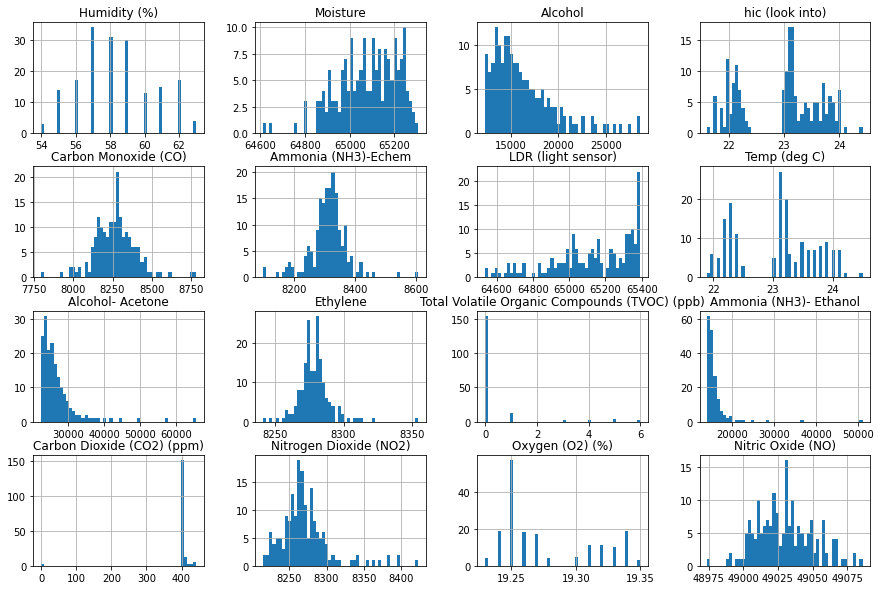

In [5]:
df_base_line[cols].hist(bins = 50, figsize = (15, 10))

LDR (light sensor)    65236.406780
Moisture              64988.728814
Oxygen (O2) (%)          19.256610
Humidity (%)             56.322034
Temp (deg C)             23.789831
dtype: float64

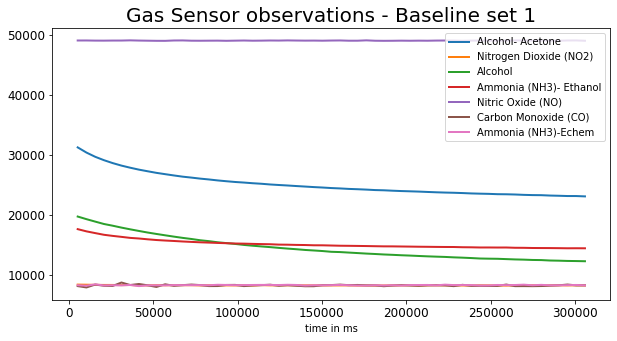

In [6]:
df_baseline_set1 = df_base_line[:59]
df_baseline_set1 = df_baseline_set1.set_index('ms')
ax = df_baseline_set1[gas_sensors].plot(linewidth=2, fontsize=12,figsize=(10, 5));
# Additional customizations
ax.set_xlabel('time in ms');
ax.legend(fontsize=10);
ax.set_title('Gas Sensor observations - Baseline set 1', fontsize = 20)
df_baseline_set1[['LDR (light sensor)','Moisture','Oxygen (O2) (%)','Humidity (%)', 'Temp (deg C)']].mean()

LDR (light sensor)    64938.305085
Moisture              65047.000000
Oxygen (O2) (%)          19.326102
Humidity (%)             60.864407
Temp (deg C)             23.152542
dtype: float64

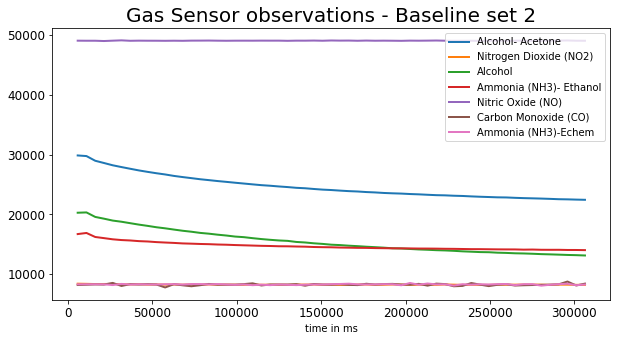

In [7]:
df_baseline_set2 = df_base_line[59:118]
df_baseline_set2 = df_baseline_set2.set_index('ms')
ax = df_baseline_set2[gas_sensors].plot(linewidth=2, fontsize=12,figsize=(10, 5));
# Additional customizations
ax.set_xlabel('time in ms');
ax.legend(fontsize=10);
ax.set_title('Gas Sensor observations - Baseline set 2', fontsize = 20)
df_baseline_set2[['LDR (light sensor)','Moisture','Oxygen (O2) (%)','Humidity (%)', 'Temp (deg C)']].mean()

LDR (light sensor)    65199.666667
Moisture              65200.050000
Oxygen (O2) (%)          19.249667
Humidity (%)             57.950000
Temp (deg C)             22.250000
dtype: float64

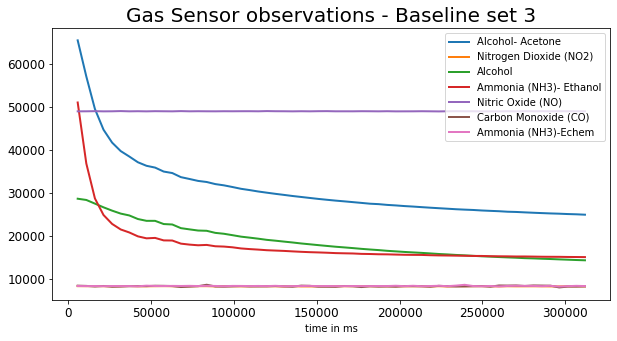

In [8]:
df_baseline_set3 = df_base_line[118:178]
df_baseline_set3 = df_baseline_set3.set_index('ms')
ax = df_baseline_set3[gas_sensors].plot(linewidth=2, fontsize=12,figsize=(10, 5));
# Additional customizations
ax.set_xlabel('time in ms');
ax.legend(fontsize=10);
ax.set_title('Gas Sensor observations - Baseline set 3', fontsize = 20)
df_baseline_set3[['LDR (light sensor)','Moisture','Oxygen (O2) (%)','Humidity (%)', 'Temp (deg C)']].mean()

## Ethanol 123 Data Description

In [9]:
df_ethanol_123 = pd.read_excel('DATALOG_Real.xlsm', sheet_name='Ethanol, 123ppm', header = 2)

array([[<AxesSubplot:title={'center':'Humidity (%)'}>,
        <AxesSubplot:title={'center':'Moisture'}>,
        <AxesSubplot:title={'center':'Alcohol'}>,
        <AxesSubplot:title={'center':'hic (look into)'}>],
       [<AxesSubplot:title={'center':'Carbon Monoxide (CO)'}>,
        <AxesSubplot:title={'center':'Ammonia (NH3)-Echem'}>,
        <AxesSubplot:title={'center':'LDR (light sensor)'}>,
        <AxesSubplot:title={'center':'Temp (deg C)'}>],
       [<AxesSubplot:title={'center':'Alcohol- Acetone'}>,
        <AxesSubplot:title={'center':'Ethylene'}>,
        <AxesSubplot:title={'center':'Total Volatile Organic Compounds (TVOC) (ppb)'}>,
        <AxesSubplot:title={'center':'Ammonia (NH3)- Ethanol'}>],
       [<AxesSubplot:title={'center':'Carbon Dioxide (CO2) (ppm)'}>,
        <AxesSubplot:title={'center':'Nitrogen Dioxide (NO2)'}>,
        <AxesSubplot:title={'center':'Oxygen (O2) (%)'}>,
        <AxesSubplot:title={'center':'Nitric Oxide (NO)'}>]], dtype=object)

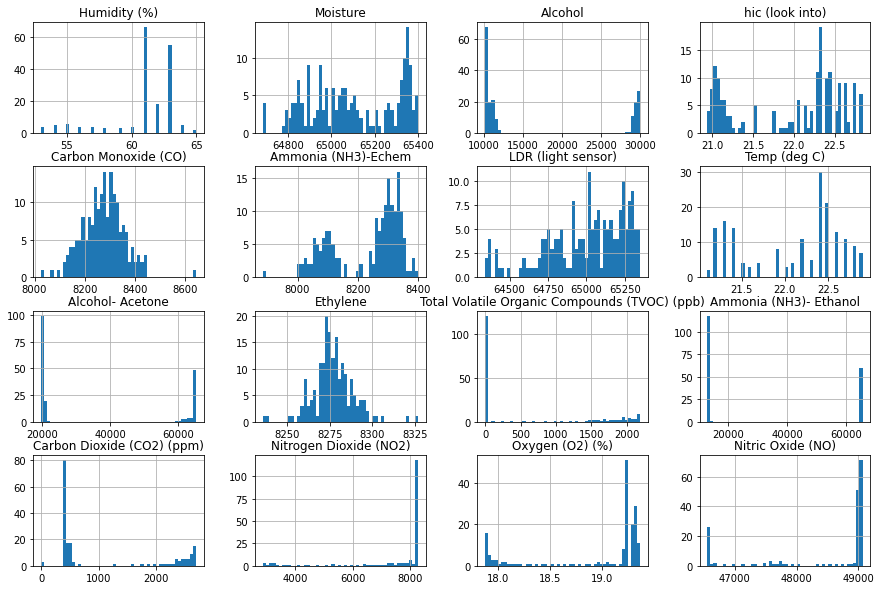

In [10]:
df_ethanol_123[cols].hist(bins = 50, figsize = (15, 10))

LDR (light sensor)    64788.966667
Moisture              65339.166667
Oxygen (O2) (%)          19.327167
Humidity (%)             61.016667
Temp (deg C)             22.555000
dtype: float64

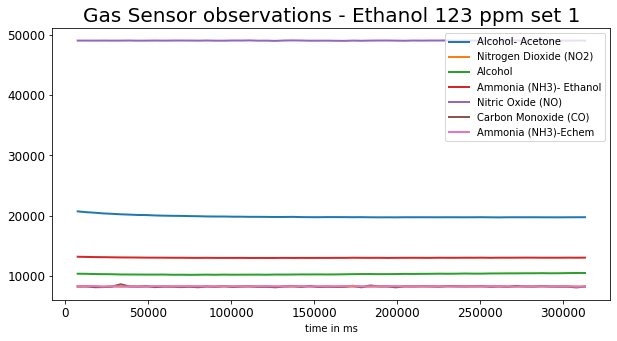

In [11]:
df_ethanol_123_set1 = df_ethanol_123[:60]
df_ethanol_123_set1 = df_ethanol_123_set1.set_index('ms')
ax = df_ethanol_123_set1[gas_sensors].plot(linewidth=2, fontsize=12,figsize=(10, 5));
# Additional customizations
ax.set_xlabel('time in ms');
ax.legend(fontsize=10);
ax.set_title('Gas Sensor observations - Ethanol 123 ppm set 1', fontsize = 20)
df_ethanol_123_set1[['LDR (light sensor)','Moisture','Oxygen (O2) (%)','Humidity (%)', 'Temp (deg C)']].mean()

LDR (light sensor)    65053.118644
Moisture              64938.203390
Oxygen (O2) (%)          19.234576
Humidity (%)             62.813559
Temp (deg C)             22.366102
dtype: float64

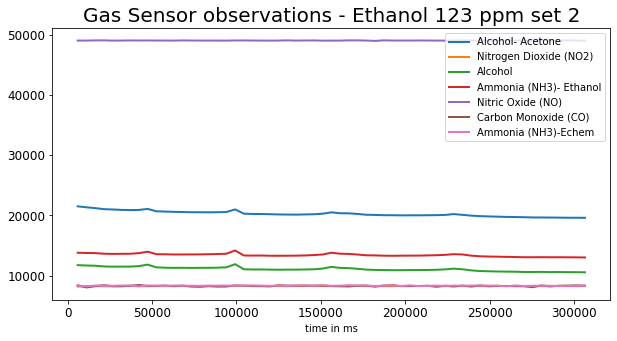

In [12]:
df_ethanol_123_set2 = df_ethanol_123[60:119]
df_ethanol_123_set2 = df_ethanol_123_set2.set_index('ms')
ax = df_ethanol_123_set2[gas_sensors].plot(linewidth=2, fontsize=12,figsize=(10, 5));
# Additional customizations
ax.set_xlabel('time in ms');
ax.legend(fontsize=10);
ax.set_title('Gas Sensor observations - Ethanol 123 ppm set 2', fontsize = 20)
df_ethanol_123_set2[['LDR (light sensor)','Moisture','Oxygen (O2) (%)','Humidity (%)', 'Temp (deg C)']].mean()

LDR (light sensor)    65156.411765
Moisture              65023.098039
Oxygen (O2) (%)          18.345098
Humidity (%)             60.058824
Temp (deg C)             21.325490
dtype: float64

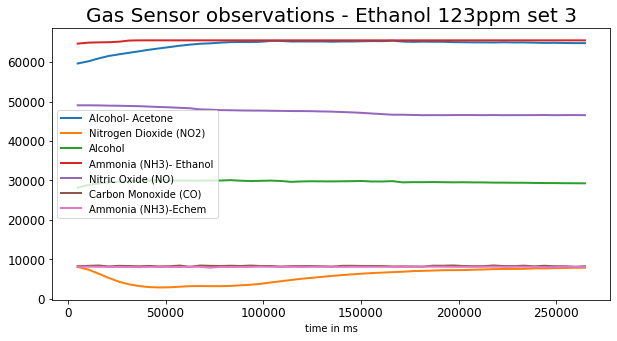

In [13]:
df_ethanol_123_set3 = df_ethanol_123[119:170]
df_ethanol_123_set3 = df_ethanol_123_set3.set_index('ms')
ax = df_ethanol_123_set3[gas_sensors].plot(linewidth=2, fontsize=12,figsize=(10, 5));
# Additional customizations
ax.set_xlabel('time in ms');
ax.legend(fontsize=10);
ax.set_title('Gas Sensor observations - Ethanol 123ppm set 3', fontsize = 20)
df_ethanol_123_set3[['LDR (light sensor)','Moisture','Oxygen (O2) (%)','Humidity (%)', 'Temp (deg C)']].mean()

## Ethanol 161ppm Data Description

In [14]:
df_ethanol_161 = pd.read_excel('DATALOG_Real.xlsm', sheet_name='Ethanol, 161ppm', header = 2)

array([[<AxesSubplot:title={'center':'Humidity (%)'}>,
        <AxesSubplot:title={'center':'Moisture'}>,
        <AxesSubplot:title={'center':'Alcohol'}>,
        <AxesSubplot:title={'center':'hic (look into)'}>],
       [<AxesSubplot:title={'center':'Carbon Monoxide (CO)'}>,
        <AxesSubplot:title={'center':'Ammonia (NH3)-Echem'}>,
        <AxesSubplot:title={'center':'LDR (light sensor)'}>,
        <AxesSubplot:title={'center':'Temp (deg C)'}>],
       [<AxesSubplot:title={'center':'Alcohol- Acetone'}>,
        <AxesSubplot:title={'center':'Ethylene'}>,
        <AxesSubplot:title={'center':'Total Volatile Organic Compounds (TVOC) (ppb)'}>,
        <AxesSubplot:title={'center':'Ammonia (NH3)- Ethanol'}>],
       [<AxesSubplot:title={'center':'Carbon Dioxide (CO2) (ppm)'}>,
        <AxesSubplot:title={'center':'Nitrogen Dioxide (NO2)'}>,
        <AxesSubplot:title={'center':'Oxygen (O2) (%)'}>,
        <AxesSubplot:title={'center':'Nitric Oxide (NO)'}>]], dtype=object)

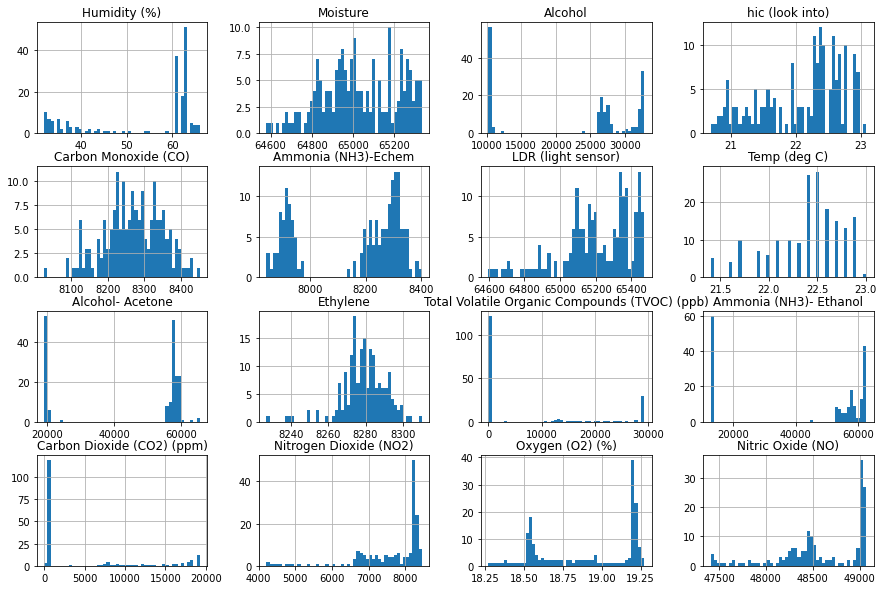

In [15]:
df_ethanol_161[cols].hist(bins = 50, figsize = (15, 10))

LDR (light sensor)    65033.433333
Moisture              64919.700000
Oxygen (O2) (%)          18.853167
Humidity (%)             62.083333
Temp (deg C)             22.595000
dtype: float64

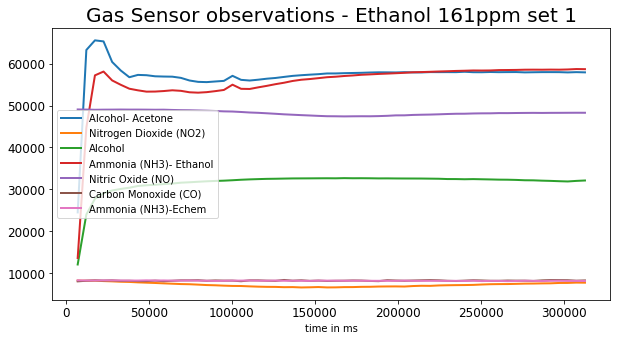

In [16]:
df_ethanol_161_set1 = df_ethanol_161[:60]
df_ethanol_161_set1 = df_ethanol_161_set1.set_index('ms')
ax = df_ethanol_161_set1[gas_sensors].plot(linewidth=2, fontsize=12,figsize=(10, 5));
# Additional customizations
ax.set_xlabel('time in ms');
ax.legend(fontsize=10);
ax.set_title('Gas Sensor observations - Ethanol 161ppm set 1', fontsize = 20)
df_ethanol_161_set1[['LDR (light sensor)','Moisture','Oxygen (O2) (%)','Humidity (%)', 'Temp (deg C)']].mean()

LDR (light sensor)    65242.254237
Moisture              65225.406780
Oxygen (O2) (%)          19.200169
Humidity (%)             62.796610
Temp (deg C)             22.513559
dtype: float64

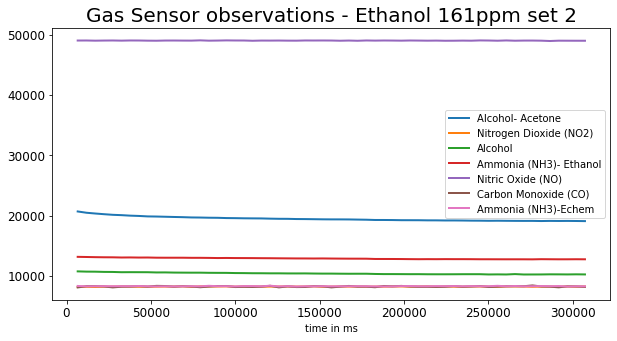

In [17]:
df_ethanol_161_set2 = df_ethanol_161[60:119]
df_ethanol_161_set2 = df_ethanol_161_set2.set_index('ms')
ax = df_ethanol_161_set2[gas_sensors].plot(linewidth=2, fontsize=12,figsize=(10, 5));
# Additional customizations
ax.set_xlabel('time in ms');
ax.legend(fontsize=10);
ax.set_title('Gas Sensor observations - Ethanol 161ppm set 2', fontsize = 20)
df_ethanol_161_set2[['LDR (light sensor)','Moisture','Oxygen (O2) (%)','Humidity (%)', 'Temp (deg C)']].mean()

LDR (light sensor)    65336.800000
Moisture              64949.016667
Oxygen (O2) (%)          18.624500
Humidity (%)             37.783333
Temp (deg C)             22.055000
dtype: float64

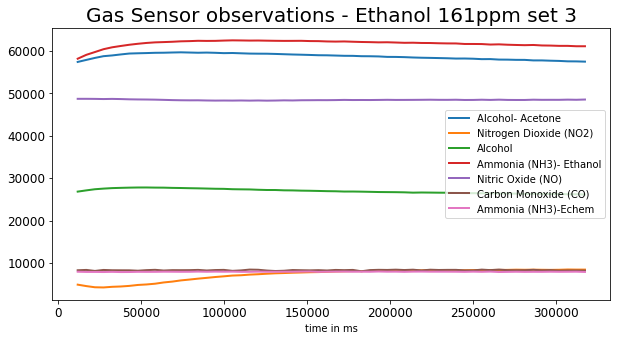

In [18]:
df_ethanol_161_set3 = df_ethanol_161[119:179]
df_ethanol_161_set3 = df_ethanol_161_set3.set_index('ms')
ax = df_ethanol_161_set3[gas_sensors].plot(linewidth=2, fontsize=12,figsize=(10, 5));
# Additional customizations
ax.set_xlabel('time in ms');
ax.legend(fontsize=10);
ax.set_title('Gas Sensor observations - Ethanol 161ppm set 3', fontsize = 20)
df_ethanol_161_set3[['LDR (light sensor)','Moisture','Oxygen (O2) (%)','Humidity (%)', 'Temp (deg C)']].mean()

## Ethanol 200ppm Data Description

In [19]:
df_ethanol_200 = pd.read_excel('DATALOG_Real.xlsm', sheet_name='Ethanol, 200ppm', header = 2)

array([[<AxesSubplot:title={'center':'Humidity (%)'}>,
        <AxesSubplot:title={'center':'Moisture'}>,
        <AxesSubplot:title={'center':'Alcohol'}>,
        <AxesSubplot:title={'center':'hic (look into)'}>],
       [<AxesSubplot:title={'center':'Carbon Monoxide (CO)'}>,
        <AxesSubplot:title={'center':'Ammonia (NH3)-Echem'}>,
        <AxesSubplot:title={'center':'LDR (light sensor)'}>,
        <AxesSubplot:title={'center':'Temp (deg C)'}>],
       [<AxesSubplot:title={'center':'Alcohol- Acetone'}>,
        <AxesSubplot:title={'center':'Ethylene'}>,
        <AxesSubplot:title={'center':'Total Volatile Organic Compounds (TVOC) (ppb)'}>,
        <AxesSubplot:title={'center':'Ammonia (NH3)- Ethanol'}>],
       [<AxesSubplot:title={'center':'Carbon Dioxide (CO2) (ppm)'}>,
        <AxesSubplot:title={'center':'Nitrogen Dioxide (NO2)'}>,
        <AxesSubplot:title={'center':'Oxygen (O2) (%)'}>,
        <AxesSubplot:title={'center':'Nitric Oxide (NO)'}>]], dtype=object)

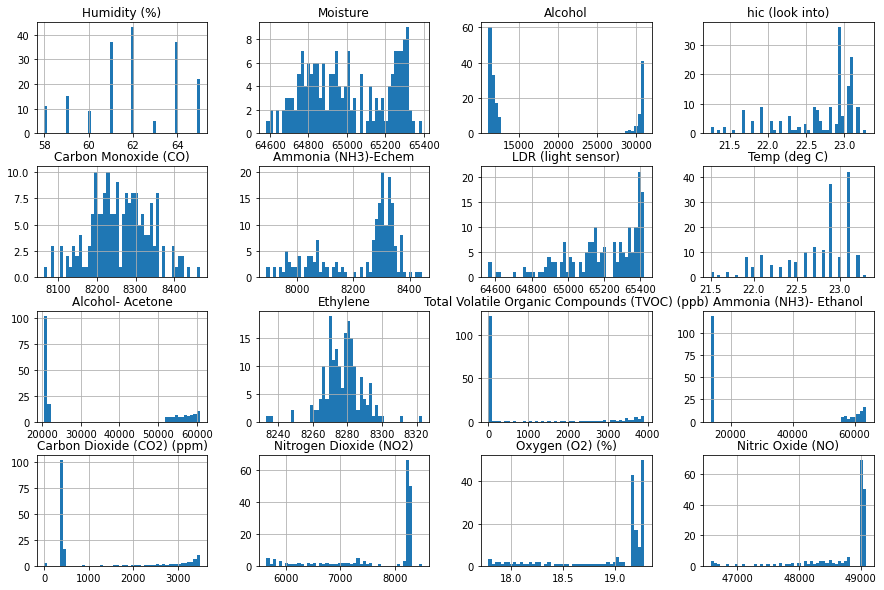

In [20]:
df_ethanol_200[cols].hist(bins = 50, figsize = (15, 10))

LDR (light sensor)    65257.766667
Moisture              65256.566667
Oxygen (O2) (%)          19.178000
Humidity (%)             61.533333
Temp (deg C)             23.105000
dtype: float64

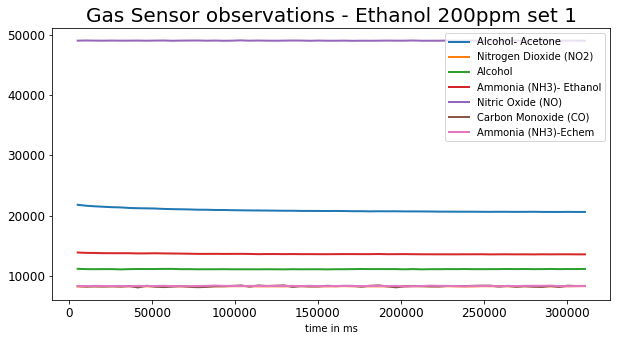

In [21]:
df_ethanol_200_set1 = df_ethanol_200[:60]
df_ethanol_200_set1 = df_ethanol_200_set1.set_index('ms')
ax = df_ethanol_200_set1[gas_sensors].plot(linewidth=2, fontsize=12,figsize=(10, 5));
# Additional customizations
ax.set_xlabel('time in ms');
ax.legend(fontsize=10);
ax.set_title('Gas Sensor observations - Ethanol 200ppm set 1', fontsize = 20)
df_ethanol_200_set1[['LDR (light sensor)','Moisture','Oxygen (O2) (%)','Humidity (%)', 'Temp (deg C)']].mean()

LDR (light sensor)    65009.813559
Moisture              64784.423729
Oxygen (O2) (%)          19.256949
Humidity (%)             64.372881
Temp (deg C)             22.805085
dtype: float64

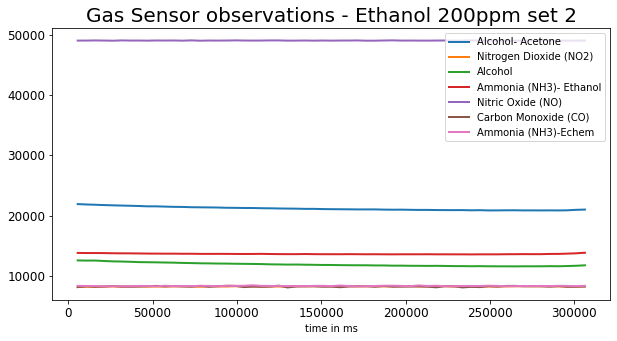

In [22]:
df_ethanol_200_set2 = df_ethanol_200[60:119]
df_ethanol_200_set2 = df_ethanol_200_set2.set_index('ms')
ax = df_ethanol_200_set2[gas_sensors].plot(linewidth=2, fontsize=12,figsize=(10, 5));
# Additional customizations
ax.set_xlabel('time in ms');
ax.legend(fontsize=10);
ax.set_title('Gas Sensor observations - Ethanol 200ppm set 2', fontsize = 20)
df_ethanol_200_set2[['LDR (light sensor)','Moisture','Oxygen (O2) (%)','Humidity (%)', 'Temp (deg C)']].mean()

LDR (light sensor)    65293.633333
Moisture              64969.483333
Oxygen (O2) (%)          18.424000
Humidity (%)             60.150000
Temp (deg C)             22.248333
dtype: float64

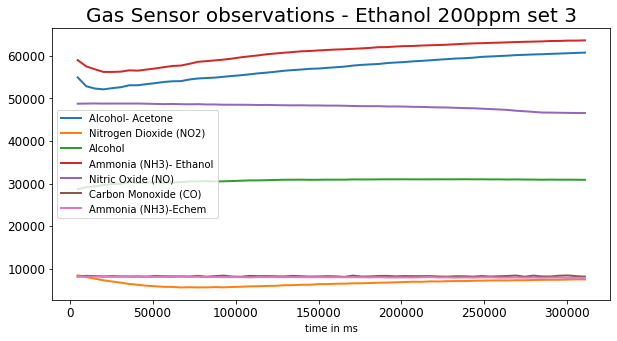

In [23]:
df_ethanol_200_set3 = df_ethanol_200[119:179]
df_ethanol_200_set3 = df_ethanol_200_set3.set_index('ms')
ax = df_ethanol_200_set3[gas_sensors].plot(linewidth=2, fontsize=12,figsize=(10, 5));
# Additional customizations
ax.set_xlabel('time in ms');
ax.legend(fontsize=10);
ax.set_title('Gas Sensor observations - Ethanol 200ppm set 3', fontsize = 20)
df_ethanol_200_set3[['LDR (light sensor)','Moisture','Oxygen (O2) (%)','Humidity (%)', 'Temp (deg C)']].mean()

## Methanol 292ppm Data Description

In [24]:
df_methanol_292 = pd.read_excel('DATALOG_Real.xlsm', sheet_name='Methanol, 292ppm', header = 2)

array([[<AxesSubplot:title={'center':'Humidity (%)'}>,
        <AxesSubplot:title={'center':'Moisture'}>,
        <AxesSubplot:title={'center':'Alcohol'}>,
        <AxesSubplot:title={'center':'hic (look into)'}>],
       [<AxesSubplot:title={'center':'Carbon Monoxide (CO)'}>,
        <AxesSubplot:title={'center':'Ammonia (NH3)-Echem'}>,
        <AxesSubplot:title={'center':'LDR (light sensor)'}>,
        <AxesSubplot:title={'center':'Temp (deg C)'}>],
       [<AxesSubplot:title={'center':'Alcohol- Acetone'}>,
        <AxesSubplot:title={'center':'Ethylene'}>,
        <AxesSubplot:title={'center':'Total Volatile Organic Compounds (TVOC) (ppb)'}>,
        <AxesSubplot:title={'center':'Ammonia (NH3)- Ethanol'}>],
       [<AxesSubplot:title={'center':'Carbon Dioxide (CO2) (ppm)'}>,
        <AxesSubplot:title={'center':'Nitrogen Dioxide (NO2)'}>,
        <AxesSubplot:title={'center':'Oxygen (O2) (%)'}>,
        <AxesSubplot:title={'center':'Nitric Oxide (NO)'}>]], dtype=object)

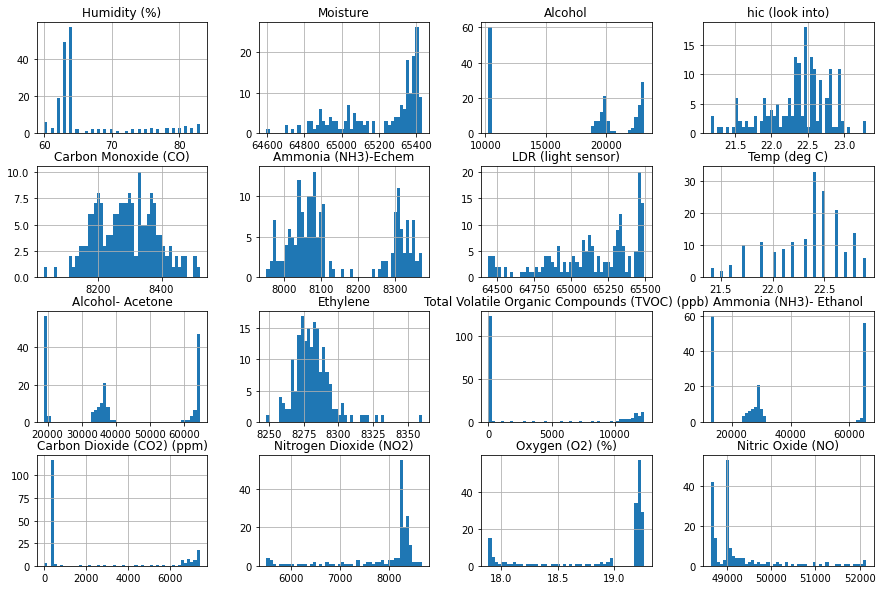

In [25]:
df_methanol_292[cols].hist(bins = 50, figsize = (15, 10))

LDR (light sensor)    64838.733333
Moisture              65378.050000
Oxygen (O2) (%)          19.237000
Humidity (%)             63.933333
Temp (deg C)             22.476667
dtype: float64

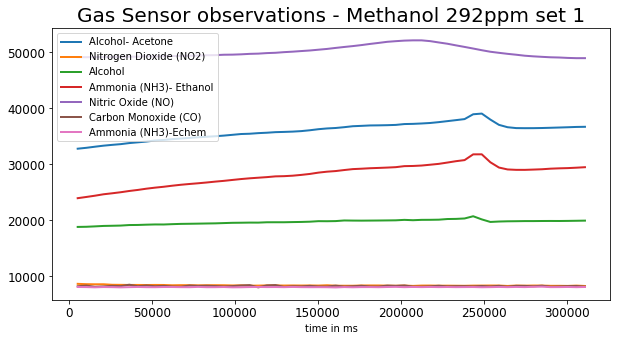

In [26]:
df_methanol_292_set1 = df_methanol_292[:60]
df_methanol_292_set1 = df_methanol_292_set1.set_index('ms')
ax = df_methanol_292_set1[gas_sensors].plot(linewidth=2, fontsize=12,figsize=(10, 5));
# Additional customizations
ax.set_xlabel('time in ms');
ax.legend(fontsize=10);
ax.set_title('Gas Sensor observations - Methanol 292ppm set 1', fontsize = 20)
df_methanol_292_set1[['LDR (light sensor)','Moisture','Oxygen (O2) (%)','Humidity (%)', 'Temp (deg C)']].mean()

LDR (light sensor)    65179.400000
Moisture              64949.133333
Oxygen (O2) (%)          19.200833
Humidity (%)             62.716667
Temp (deg C)             22.456667
dtype: float64

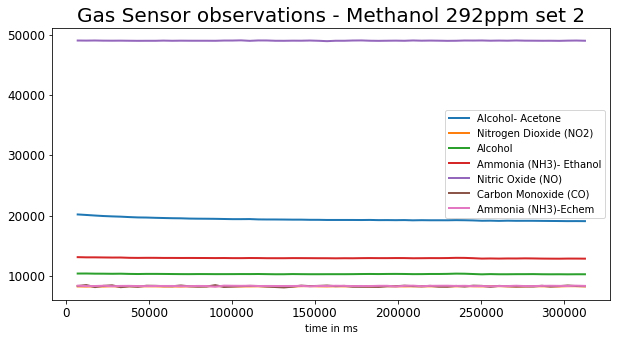

In [27]:
df_methanol_292_set2 = df_methanol_292[60:120]
df_methanol_292_set2 = df_methanol_292_set2.set_index('ms')
ax = df_methanol_292_set2[gas_sensors].plot(linewidth=2, fontsize=12,figsize=(10, 5));
# Additional customizations
ax.set_xlabel('time in ms');
ax.legend(fontsize=10);
ax.set_title('Gas Sensor observations - Methanol 292ppm set 2', fontsize = 20)
df_methanol_292_set2[['LDR (light sensor)','Moisture','Oxygen (O2) (%)','Humidity (%)', 'Temp (deg C)']].mean()

LDR (light sensor)    65393.271186
Moisture              65314.813559
Oxygen (O2) (%)          18.277119
Humidity (%)             72.305085
Temp (deg C)             22.062712
dtype: float64

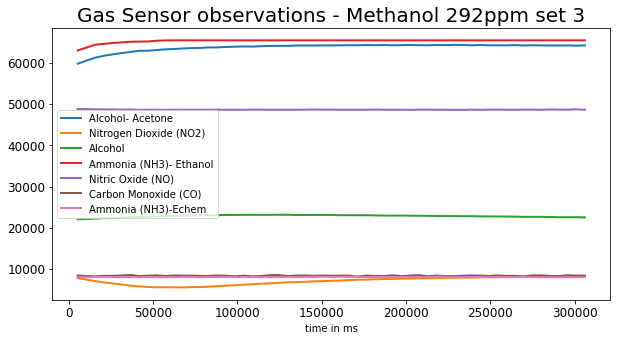

In [28]:
df_methanol_292_set3 = df_methanol_292[120:179]
df_methanol_292_set3 = df_methanol_292_set3.set_index('ms')
ax = df_methanol_292_set3[gas_sensors].plot(linewidth=2, fontsize=12,figsize=(10, 5));
# Additional customizations
ax.set_xlabel('time in ms');
ax.legend(fontsize=10);
ax.set_title('Gas Sensor observations - Methanol 292ppm set 3', fontsize = 20)
df_methanol_292_set3[['LDR (light sensor)','Moisture','Oxygen (O2) (%)','Humidity (%)', 'Temp (deg C)']].mean()

## Methanol 137ppm Data Description

In [29]:
df_methanol_137 = pd.read_excel('DATALOG_Real.xlsm', sheet_name='Methanol, 137ppm', header = 2)

array([[<AxesSubplot:title={'center':'Humidity (%)'}>,
        <AxesSubplot:title={'center':'Moisture'}>,
        <AxesSubplot:title={'center':'Alcohol'}>,
        <AxesSubplot:title={'center':'hic (look into)'}>],
       [<AxesSubplot:title={'center':'Carbon Monoxide (CO)'}>,
        <AxesSubplot:title={'center':'Ammonia (NH3)-Echem'}>,
        <AxesSubplot:title={'center':'LDR (light sensor)'}>,
        <AxesSubplot:title={'center':'Temp (deg C)'}>],
       [<AxesSubplot:title={'center':'Alcohol- Acetone'}>,
        <AxesSubplot:title={'center':'Ethylene'}>,
        <AxesSubplot:title={'center':'Total Volatile Organic Compounds (TVOC) (ppb)'}>,
        <AxesSubplot:title={'center':'Ammonia (NH3)- Ethanol'}>],
       [<AxesSubplot:title={'center':'Carbon Dioxide (CO2) (ppm)'}>,
        <AxesSubplot:title={'center':'Nitrogen Dioxide (NO2)'}>,
        <AxesSubplot:title={'center':'Oxygen (O2) (%)'}>,
        <AxesSubplot:title={'center':'Nitric Oxide (NO)'}>]], dtype=object)

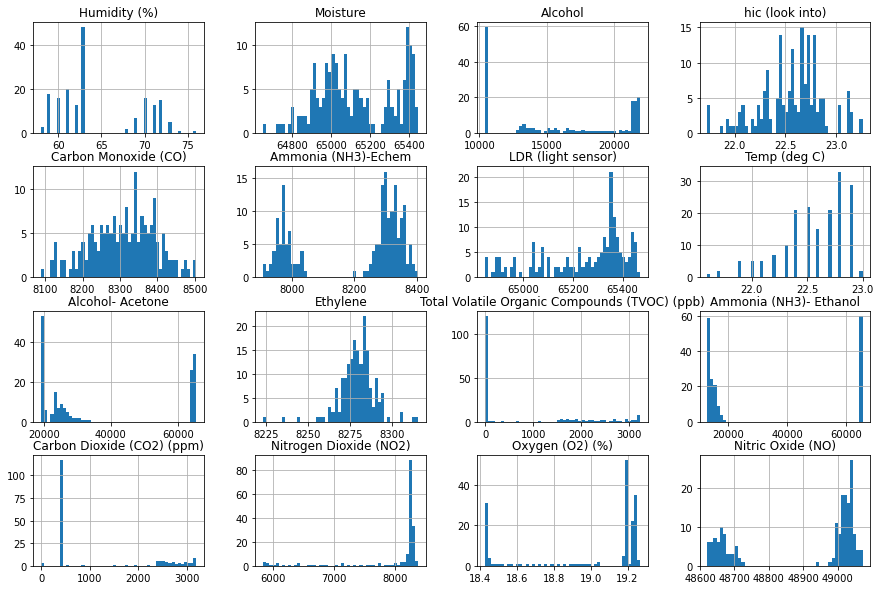

In [30]:
df_methanol_137[cols].hist(bins = 50, figsize = (15, 10))

LDR (light sensor)    65222.237288
Moisture              65022.389831
Oxygen (O2) (%)          19.239492
Humidity (%)             60.016949
Temp (deg C)             22.777966
dtype: float64

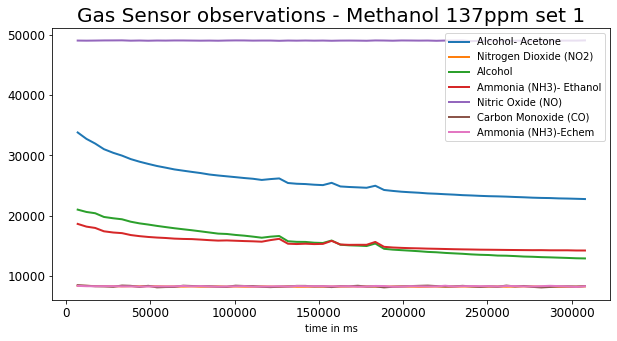

In [31]:
df_methanol_137_set1 = df_methanol_137[:59]
df_methanol_137_set1 = df_methanol_137_set1.set_index('ms')
ax = df_methanol_137_set1[gas_sensors].plot(linewidth=2, fontsize=12,figsize=(10, 5));
# Additional customizations
ax.set_xlabel('time in ms');
ax.legend(fontsize=10);
ax.set_title('Gas Sensor observations - Methanol 137ppm set 1', fontsize = 20)
df_methanol_137_set1[['LDR (light sensor)','Moisture','Oxygen (O2) (%)','Humidity (%)', 'Temp (deg C)']].mean()

LDR (light sensor)    65208.474576
Moisture              64993.101695
Oxygen (O2) (%)          19.193390
Humidity (%)             62.796610
Temp (deg C)             22.506780
dtype: float64

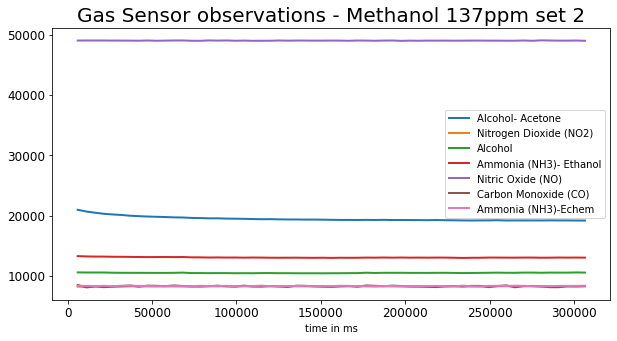

In [32]:
df_methanol_137_set2 = df_methanol_137[59:118]
df_methanol_137_set2 = df_methanol_137_set2.set_index('ms')
ax = df_methanol_137_set2[gas_sensors].plot(linewidth=2, fontsize=12,figsize=(10, 5));
# Additional customizations
ax.set_xlabel('time in ms');
ax.legend(fontsize=10);
ax.set_title('Gas Sensor observations - Methanol 137ppm set 2', fontsize = 20)
df_methanol_137_set2[['LDR (light sensor)','Moisture','Oxygen (O2) (%)','Humidity (%)', 'Temp (deg C)']].mean()

LDR (light sensor)    65307.233333
Moisture              65374.000000
Oxygen (O2) (%)          18.577333
Humidity (%)             70.950000
Temp (deg C)             22.420000
dtype: float64

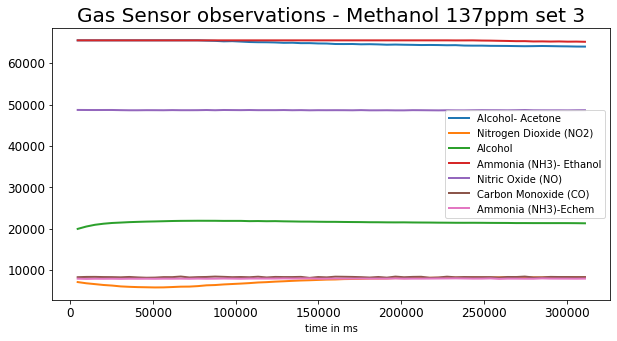

In [33]:
df_methanol_137_set3 = df_methanol_137[118:179]
df_methanol_137_set3 = df_methanol_137_set3.set_index('ms')
ax = df_methanol_137_set3[gas_sensors].plot(linewidth=2, fontsize=12,figsize=(10, 5));
# Additional customizations
ax.set_xlabel('time in ms');
ax.legend(fontsize=10);
ax.set_title('Gas Sensor observations - Methanol 137ppm set 3', fontsize = 20)
df_methanol_137_set3[['LDR (light sensor)','Moisture','Oxygen (O2) (%)','Humidity (%)', 'Temp (deg C)']].mean()

## Methanol 164ppm Data Description

In [34]:
df_methanol_164 = pd.read_excel('DATALOG_Real.xlsm', sheet_name='Methanol, 164ppm', header = 2)

array([[<AxesSubplot:title={'center':'Humidity (%)'}>,
        <AxesSubplot:title={'center':'Moisture'}>,
        <AxesSubplot:title={'center':'Alcohol'}>,
        <AxesSubplot:title={'center':'hic (look into)'}>],
       [<AxesSubplot:title={'center':'Carbon Monoxide (CO)'}>,
        <AxesSubplot:title={'center':'Ammonia (NH3)-Echem'}>,
        <AxesSubplot:title={'center':'LDR (light sensor)'}>,
        <AxesSubplot:title={'center':'Temp (deg C)'}>],
       [<AxesSubplot:title={'center':'Alcohol- Acetone'}>,
        <AxesSubplot:title={'center':'Ethylene'}>,
        <AxesSubplot:title={'center':'Total Volatile Organic Compounds (TVOC) (ppb)'}>,
        <AxesSubplot:title={'center':'Ammonia (NH3)- Ethanol'}>],
       [<AxesSubplot:title={'center':'Carbon Dioxide (CO2) (ppm)'}>,
        <AxesSubplot:title={'center':'Nitrogen Dioxide (NO2)'}>,
        <AxesSubplot:title={'center':'Oxygen (O2) (%)'}>,
        <AxesSubplot:title={'center':'Nitric Oxide (NO)'}>]], dtype=object)

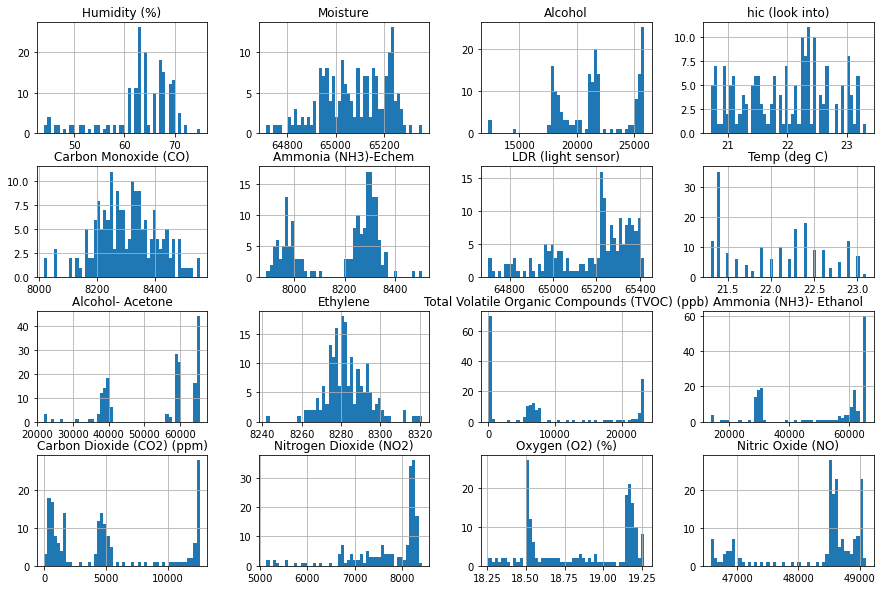

In [35]:
df_methanol_164[cols].hist(bins = 50, figsize = (15, 10))

LDR (light sensor)    65211.883333
Moisture              64978.750000
Oxygen (O2) (%)          19.174500
Humidity (%)             62.850000
Temp (deg C)             22.158333
dtype: float64

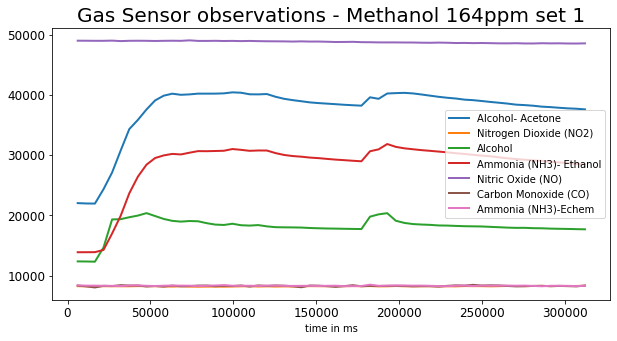

In [36]:
df_methanol_164_set1 = df_methanol_164[:60]
df_methanol_164_set1 = df_methanol_164_set1.set_index('ms')
ax = df_methanol_164_set1[gas_sensors].plot(linewidth=2, fontsize=12,figsize=(10, 5));
# Additional customizations
ax.set_xlabel('time in ms');
ax.legend(fontsize=10);
ax.set_title('Gas Sensor observations - Methanol 164ppm set 1', fontsize = 20)
df_methanol_164_set1[['LDR (light sensor)','Moisture','Oxygen (O2) (%)','Humidity (%)', 'Temp (deg C)']].mean()

LDR (light sensor)    65086.694915
Moisture              65080.864407
Oxygen (O2) (%)          18.791695
Humidity (%)             58.169492
Temp (deg C)             21.408475
dtype: float64

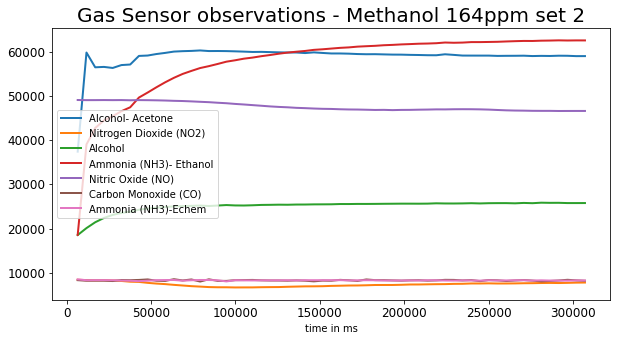

In [37]:
df_methanol_164_set2 = df_methanol_164[60:119]
df_methanol_164_set2 = df_methanol_164_set2.set_index('ms')
ax = df_methanol_164_set2[gas_sensors].plot(linewidth=2, fontsize=12,figsize=(10, 5));
# Additional customizations
ax.set_xlabel('time in ms');
ax.legend(fontsize=10);
ax.set_title('Gas Sensor observations - Methanol 164ppm set 2', fontsize = 20)
df_methanol_164_set2[['LDR (light sensor)','Moisture','Oxygen (O2) (%)','Humidity (%)', 'Temp (deg C)']].mean()

LDR (light sensor)    65246.933333
Moisture              65173.483333
Oxygen (O2) (%)          18.602333
Humidity (%)             68.283333
Temp (deg C)             22.601667
dtype: float64

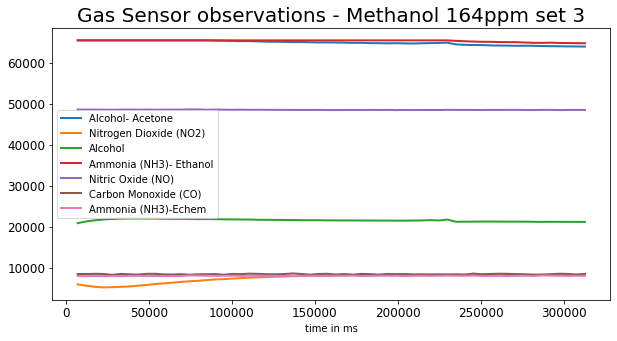

In [38]:
df_methanol_164_set3 = df_methanol_164[119:179]
df_methanol_164_set3 = df_methanol_164_set3.set_index('ms')
ax = df_methanol_164_set3[gas_sensors].plot(linewidth=2, fontsize=12,figsize=(10, 5));
# Additional customizations
ax.set_xlabel('time in ms');
ax.legend(fontsize=10);
ax.set_title('Gas Sensor observations - Methanol 164ppm set 3', fontsize = 20)
df_methanol_164_set3[['LDR (light sensor)','Moisture','Oxygen (O2) (%)','Humidity (%)', 'Temp (deg C)']].mean()

## Isopropanol 217ppm Data Description

In [39]:
df_isopropanol_217 = pd.read_excel('DATALOG_Real.xlsm', sheet_name='Isopropanol, 217ppm', header = 2)

array([[<AxesSubplot:title={'center':'Humidity (%)'}>,
        <AxesSubplot:title={'center':'Moisture'}>,
        <AxesSubplot:title={'center':'Alcohol'}>,
        <AxesSubplot:title={'center':'hic (look into)'}>],
       [<AxesSubplot:title={'center':'Carbon Monoxide (CO)'}>,
        <AxesSubplot:title={'center':'Ammonia (NH3)-Echem'}>,
        <AxesSubplot:title={'center':'LDR (light sensor)'}>,
        <AxesSubplot:title={'center':'Temp (deg C)'}>],
       [<AxesSubplot:title={'center':'Alcohol- Acetone'}>,
        <AxesSubplot:title={'center':'Ethylene'}>,
        <AxesSubplot:title={'center':'Total Volatile Organic Compounds (TVOC) (ppb)'}>,
        <AxesSubplot:title={'center':'Ammonia (NH3)- Ethanol'}>],
       [<AxesSubplot:title={'center':'Carbon Dioxide (CO2) (ppm)'}>,
        <AxesSubplot:title={'center':'Nitrogen Dioxide (NO2)'}>,
        <AxesSubplot:title={'center':'Oxygen (O2) (%)'}>,
        <AxesSubplot:title={'center':'Nitric Oxide (NO)'}>]], dtype=object)

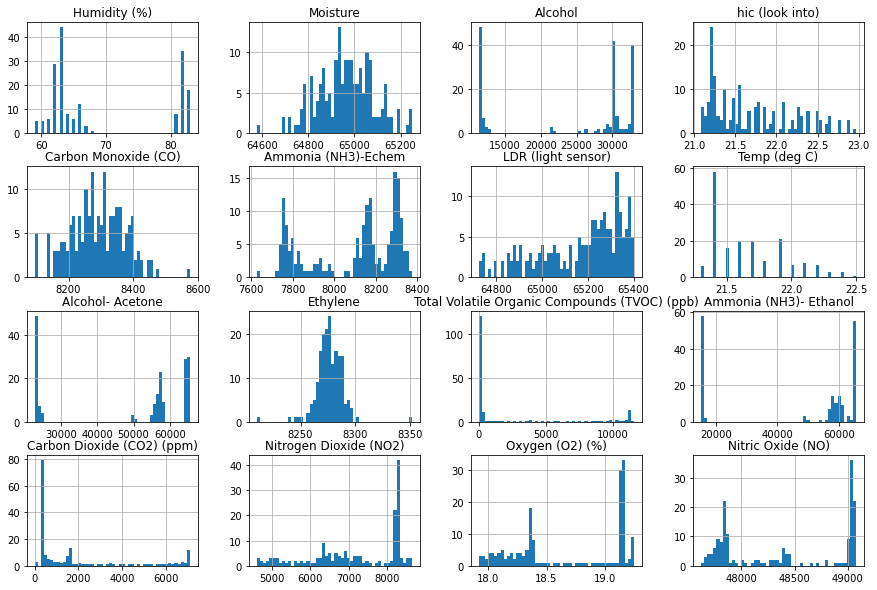

In [40]:
df_isopropanol_217[cols].hist(bins = 50, figsize = (15, 10))

LDR (light sensor)    65174.400000
Moisture              64966.500000
Oxygen (O2) (%)          19.145333
Humidity (%)             62.700000
Temp (deg C)             21.566667
dtype: float64

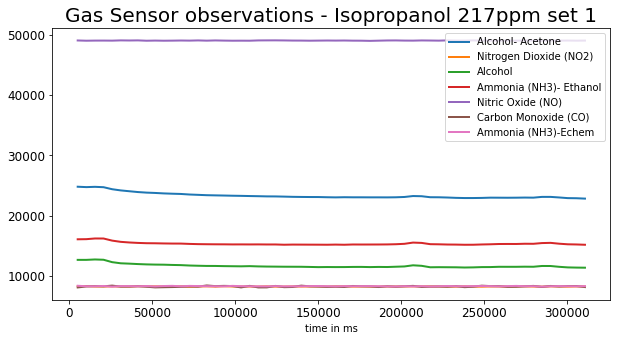

In [41]:
df_isopropanol_217_set1 = df_isopropanol_217[:60]
df_isopropanol_217_set1 = df_isopropanol_217_set1.set_index('ms')
ax = df_isopropanol_217_set1[gas_sensors].plot(linewidth=2, fontsize=12,figsize=(10, 5));
# Additional customizations
ax.set_xlabel('time in ms');
ax.legend(fontsize=10);
ax.set_title('Gas Sensor observations - Isopropanol 217ppm set 1', fontsize = 20)
df_isopropanol_217_set1[['LDR (light sensor)','Moisture','Oxygen (O2) (%)','Humidity (%)', 'Temp (deg C)']].mean()

LDR (light sensor)    65055.883333
Moisture              64985.900000
Oxygen (O2) (%)          18.240333
Humidity (%)             82.166667
Temp (deg C)             21.906667
dtype: float64

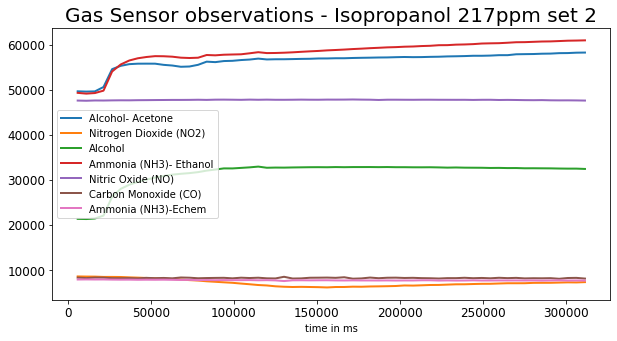

In [42]:
df_isopropanol_217_set2 = df_isopropanol_217[60:120]
df_isopropanol_217_set2 = df_isopropanol_217_set2.set_index('ms')
ax = df_isopropanol_217_set2[gas_sensors].plot(linewidth=2, fontsize=12,figsize=(10, 5));
# Additional customizations
ax.set_xlabel('time in ms');
ax.legend(fontsize=10);
ax.set_title('Gas Sensor observations - Isopropanol 217ppm set 2', fontsize = 20)
df_isopropanol_217_set2[['LDR (light sensor)','Moisture','Oxygen (O2) (%)','Humidity (%)', 'Temp (deg C)']].mean()

LDR (light sensor)    65281.694915
Moisture              64938.932203
Oxygen (O2) (%)          18.659322
Humidity (%)             63.254237
Temp (deg C)             21.516949
dtype: float64

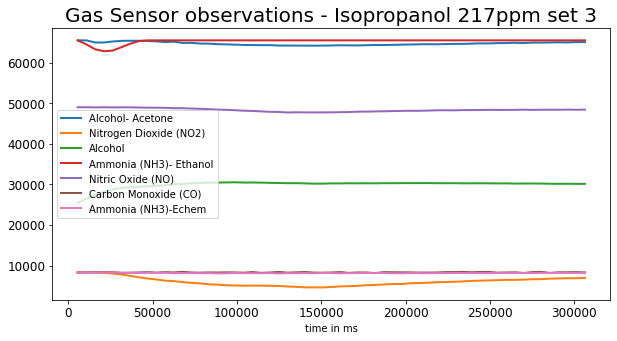

In [43]:
df_isopropanol_217_set3 = df_isopropanol_217[120:179]
df_isopropanol_217_set3 = df_isopropanol_217_set3.set_index('ms')
ax = df_isopropanol_217_set3[gas_sensors].plot(linewidth=2, fontsize=12,figsize=(10, 5));
# Additional customizations
ax.set_xlabel('time in ms');
ax.legend(fontsize=10);
ax.set_title('Gas Sensor observations - Isopropanol 217ppm set 3', fontsize = 20)
df_isopropanol_217_set3[['LDR (light sensor)','Moisture','Oxygen (O2) (%)','Humidity (%)', 'Temp (deg C)']].mean()

## Isopropanol 117ppm Data description

In [44]:
df_isopropanol_117 = pd.read_excel('DATALOG_Real.xlsm', sheet_name='Isopropanol, 117ppm', header = 2)

array([[<AxesSubplot:title={'center':'Humidity (%)'}>,
        <AxesSubplot:title={'center':'Moisture'}>,
        <AxesSubplot:title={'center':'Alcohol'}>,
        <AxesSubplot:title={'center':'hic (look into)'}>],
       [<AxesSubplot:title={'center':'Carbon Monoxide (CO)'}>,
        <AxesSubplot:title={'center':'Ammonia (NH3)-Echem'}>,
        <AxesSubplot:title={'center':'LDR (light sensor)'}>,
        <AxesSubplot:title={'center':'Temp (deg C)'}>],
       [<AxesSubplot:title={'center':'Alcohol- Acetone'}>,
        <AxesSubplot:title={'center':'Ethylene'}>,
        <AxesSubplot:title={'center':'Total Volatile Organic Compounds (TVOC) (ppb)'}>,
        <AxesSubplot:title={'center':'Ammonia (NH3)- Ethanol'}>],
       [<AxesSubplot:title={'center':'Carbon Dioxide (CO2) (ppm)'}>,
        <AxesSubplot:title={'center':'Nitrogen Dioxide (NO2)'}>,
        <AxesSubplot:title={'center':'Oxygen (O2) (%)'}>,
        <AxesSubplot:title={'center':'Nitric Oxide (NO)'}>]], dtype=object)

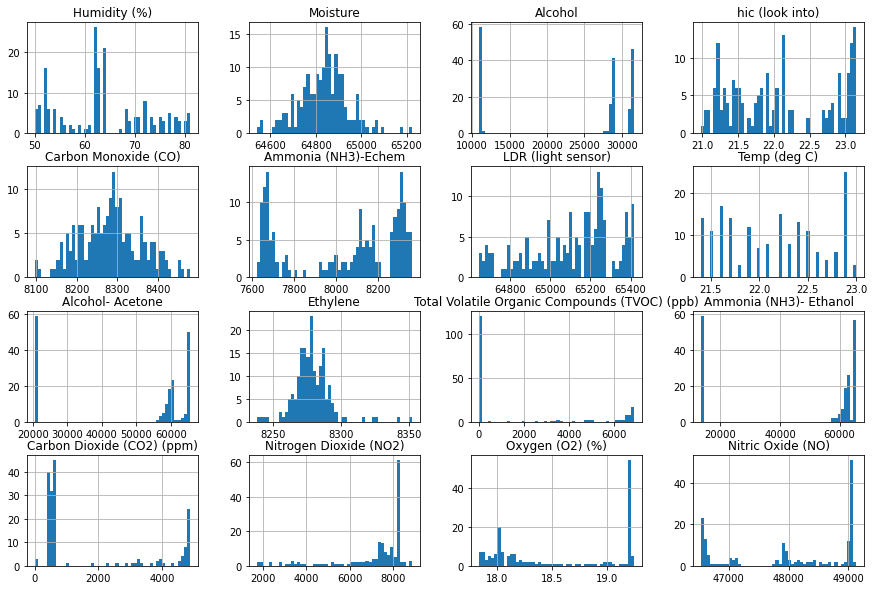

In [45]:
df_isopropanol_117[cols].hist(bins = 50, figsize = (15, 10))

LDR (light sensor)    65035.762712
Moisture              64833.254237
Oxygen (O2) (%)          19.212881
Humidity (%)             62.949153
Temp (deg C)             21.876271
dtype: float64

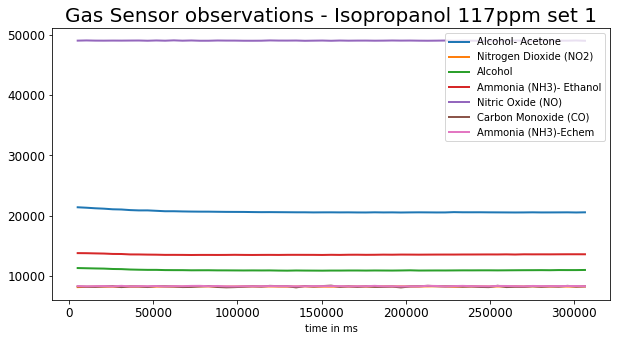

In [46]:
df_isopropanol_117_set1 = df_isopropanol_117[:59]
df_isopropanol_117_set1 = df_isopropanol_117_set1.set_index('ms')
ax = df_isopropanol_117_set1[gas_sensors].plot(linewidth=2, fontsize=12,figsize=(10, 5));
# Additional customizations
ax.set_xlabel('time in ms');
ax.legend(fontsize=10);
ax.set_title('Gas Sensor observations - Isopropanol 117ppm set 1', fontsize = 20)
df_isopropanol_117_set1[['LDR (light sensor)','Moisture','Oxygen (O2) (%)','Humidity (%)', 'Temp (deg C)']].mean()

LDR (light sensor)    65034.423729
Moisture              64799.627119
Oxygen (O2) (%)          17.960508
Humidity (%)             74.050847
Temp (deg C)             22.720339
dtype: float64

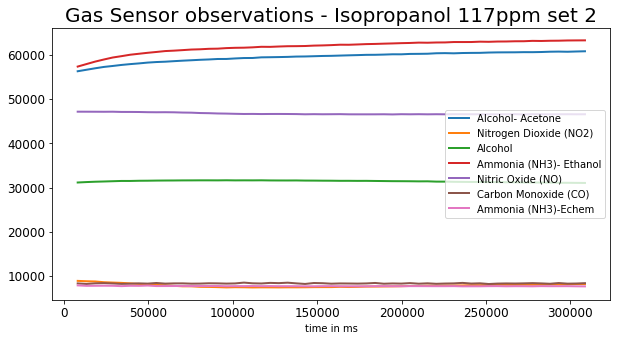

In [47]:
df_isopropanol_117_set2 = df_isopropanol_117[59:118]
df_isopropanol_117_set2 = df_isopropanol_117_set2.set_index('ms')
ax = df_isopropanol_117_set2[gas_sensors].plot(linewidth=2, fontsize=12,figsize=(10, 5));
# Additional customizations
ax.set_xlabel('time in ms');
ax.legend(fontsize=10);
ax.set_title('Gas Sensor observations - Isopropanol 117ppm set 2', fontsize = 20)
df_isopropanol_117_set2[['LDR (light sensor)','Moisture','Oxygen (O2) (%)','Humidity (%)', 'Temp (deg C)']].mean()

LDR (light sensor)    65251.525424
Moisture              64874.322034
Oxygen (O2) (%)          18.471017
Humidity (%)             53.983051
Temp (deg C)             21.859322
dtype: float64

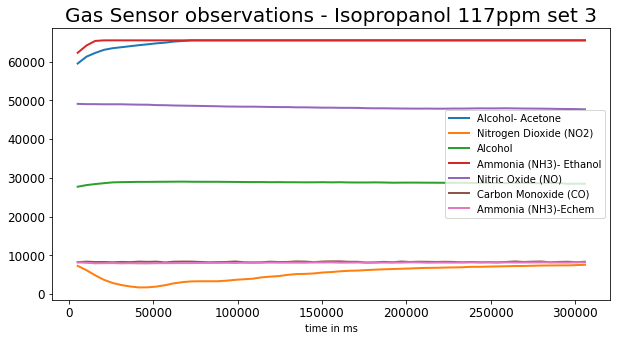

In [48]:
df_isopropanol_117_set3 = df_isopropanol_117[118:177]
df_isopropanol_117_set3 = df_isopropanol_117_set3.set_index('ms')
ax = df_isopropanol_117_set3[gas_sensors].plot(linewidth=2, fontsize=12,figsize=(10, 5));
# Additional customizations
ax.set_xlabel('time in ms');
ax.legend(fontsize=10);
ax.set_title('Gas Sensor observations - Isopropanol 117ppm set 3', fontsize = 20)
df_isopropanol_117_set3[['LDR (light sensor)','Moisture','Oxygen (O2) (%)','Humidity (%)', 'Temp (deg C)']].mean()

## Isoproponal 143ppm Data description

In [49]:
df_isopropanol_143 = pd.read_excel('DATALOG_Real.xlsm', sheet_name='Isopropanol, 143ppm', header = 2)

array([[<AxesSubplot:title={'center':'Humidity (%)'}>,
        <AxesSubplot:title={'center':'Moisture'}>,
        <AxesSubplot:title={'center':'Alcohol'}>,
        <AxesSubplot:title={'center':'hic (look into)'}>],
       [<AxesSubplot:title={'center':'Carbon Monoxide (CO)'}>,
        <AxesSubplot:title={'center':'Ammonia (NH3)-Echem'}>,
        <AxesSubplot:title={'center':'LDR (light sensor)'}>,
        <AxesSubplot:title={'center':'Temp (deg C)'}>],
       [<AxesSubplot:title={'center':'Alcohol- Acetone'}>,
        <AxesSubplot:title={'center':'Ethylene'}>,
        <AxesSubplot:title={'center':'Total Volatile Organic Compounds (TVOC) (ppb)'}>,
        <AxesSubplot:title={'center':'Ammonia (NH3)- Ethanol'}>],
       [<AxesSubplot:title={'center':'Carbon Dioxide (CO2) (ppm)'}>,
        <AxesSubplot:title={'center':'Nitrogen Dioxide (NO2)'}>,
        <AxesSubplot:title={'center':'Oxygen (O2) (%)'}>,
        <AxesSubplot:title={'center':'Nitric Oxide (NO)'}>]], dtype=object)

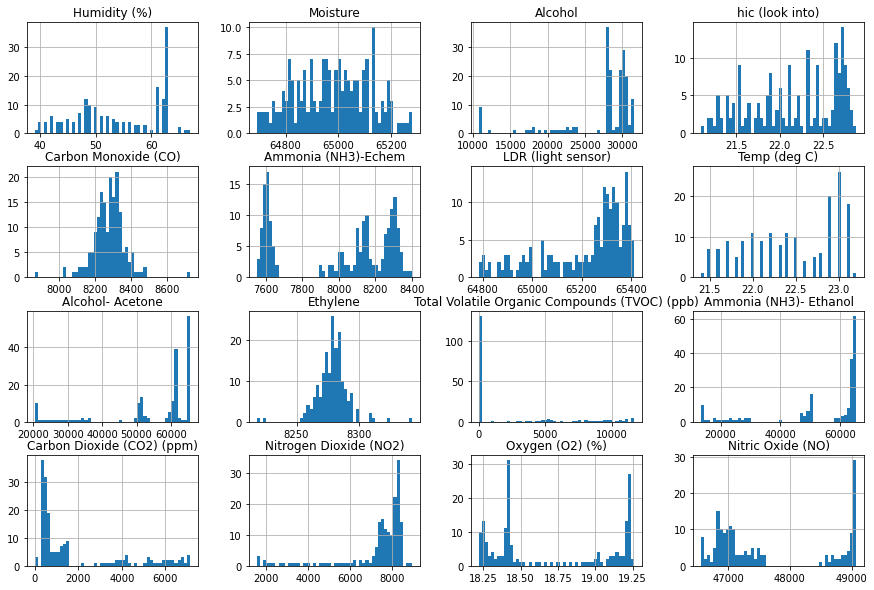

In [50]:
df_isopropanol_143[cols].hist(bins = 50, figsize = (15, 10))

LDR (light sensor)    65199.300000
Moisture              64862.333333
Oxygen (O2) (%)          19.196667
Humidity (%)             62.366667
Temp (deg C)             22.013333
dtype: float64

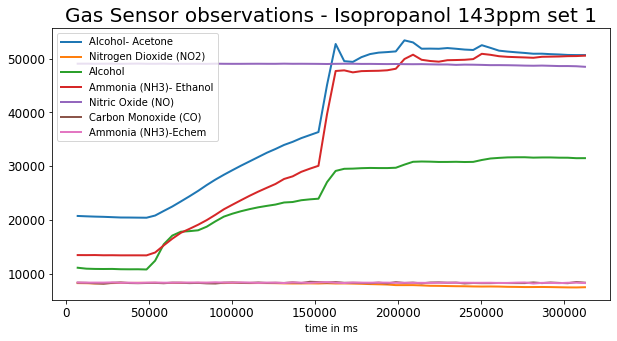

In [51]:
df_isopropanol_143_set1 = df_isopropanol_143[:60]
df_isopropanol_143_set1 = df_isopropanol_143_set1.set_index('ms')
ax = df_isopropanol_143_set1[gas_sensors].plot(linewidth=2, fontsize=12,figsize=(10, 5));
# Additional customizations
ax.set_xlabel('time in ms');
ax.legend(fontsize=10);
ax.set_title('Gas Sensor observations - Isopropanol 143ppm set 1', fontsize = 20)
df_isopropanol_143_set1[['LDR (light sensor)','Moisture','Oxygen (O2) (%)','Humidity (%)', 'Temp (deg C)']].mean()

LDR (light sensor)    65153.881356
Moisture              65012.372881
Oxygen (O2) (%)          18.389153
Humidity (%)             53.525424
Temp (deg C)             22.957627
dtype: float64

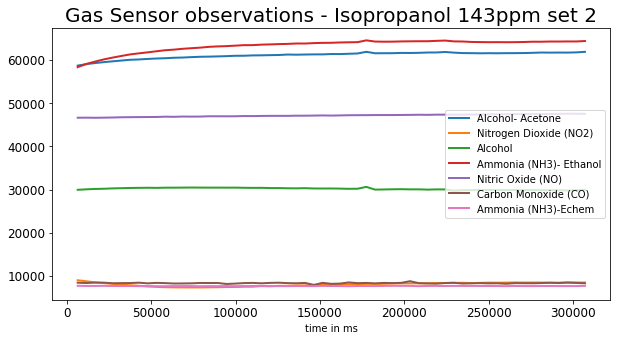

In [52]:
df_isopropanol_143_set2 = df_isopropanol_143[60:119]
df_isopropanol_143_set2 = df_isopropanol_143_set2.set_index('ms')
ax = df_isopropanol_143_set2[gas_sensors].plot(linewidth=2, fontsize=12,figsize=(10, 5));
# Additional customizations
ax.set_xlabel('time in ms');
ax.legend(fontsize=10);
ax.set_title('Gas Sensor observations - Isopropanol 143ppm set 2', fontsize = 20)
df_isopropanol_143_set2[['LDR (light sensor)','Moisture','Oxygen (O2) (%)','Humidity (%)', 'Temp (deg C)']].mean()

LDR (light sensor)    65297.983051
Moisture              65061.423729
Oxygen (O2) (%)          18.498136
Humidity (%)             46.711864
Temp (deg C)             22.369492
dtype: float64

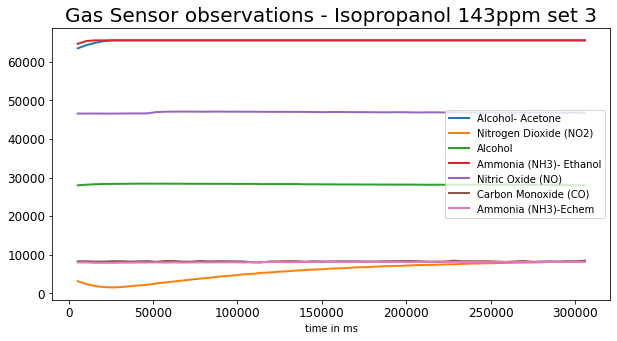

In [53]:
df_isopropanol_143_set3 = df_isopropanol_143[119:178]
df_isopropanol_143_set3 = df_isopropanol_143_set3.set_index('ms')
ax = df_isopropanol_143_set3[gas_sensors].plot(linewidth=2, fontsize=12,figsize=(10, 5));
# Additional customizations
ax.set_xlabel('time in ms');
ax.legend(fontsize=10);
ax.set_title('Gas Sensor observations - Isopropanol 143ppm set 3', fontsize = 20)
df_isopropanol_143_set3[['LDR (light sensor)','Moisture','Oxygen (O2) (%)','Humidity (%)', 'Temp (deg C)']].mean()

## PCA analysis

In [54]:
feature_columns = ['Ammonia (NH3)-Echem', 'Nitrogen Dioxide (NO2)','Carbon Monoxide (CO)','Alcohol- Acetone',
                   'Alcohol','Ammonia (NH3)- Ethanol','Nitric Oxide (NO)','Oxygen (O2) (%)',
                   'Humidity (%)', 'Temp (deg C)']

In [55]:
scalar = StandardScaler()
pca = PCA(n_components=2)


In [56]:
set_sc = scalar.fit_transform(df_base_line[feature_columns])
base_set_pca = pca.fit_transform(set_sc)

# Fit Scaling and PCA for set 1 data

In [57]:
scalar1 = StandardScaler()
pca1 = PCA(n_components=2)

In [58]:
set1_sc = scalar1.fit_transform(df_baseline_set1[feature_columns])
base_set1_pca = pca1.fit_transform(set1_sc)

# Fit Scaling and PCA for set 2 data

In [59]:
scalar2 = StandardScaler()
pca2 = PCA(n_components=2)

In [60]:
set2_sc = scalar2.fit_transform(df_baseline_set2[feature_columns])
base_set2_pca = pca2.fit_transform(set2_sc)

# Fit Scaling and PCA for set 3 data

In [61]:
scalar3 = StandardScaler()
pca3 = PCA(n_components=2)

In [62]:
set3_sc = scalar3.fit_transform(df_baseline_set3[feature_columns])
base_set3_pca = pca3.fit_transform(set3_sc)

## Ethenol 123ppm PCA

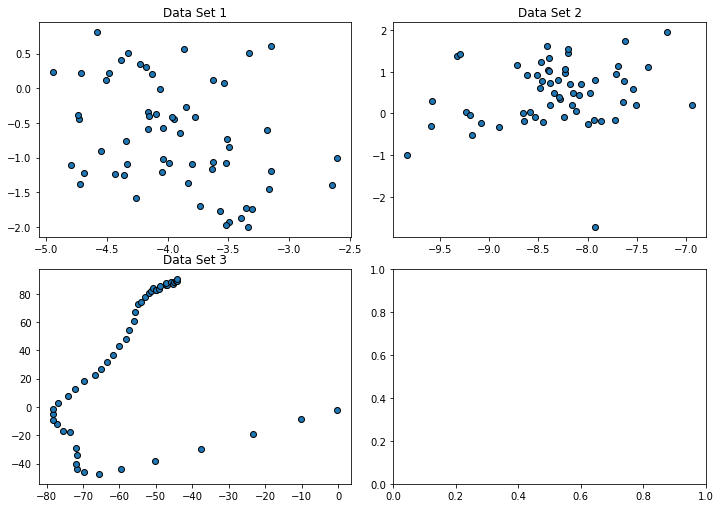

In [63]:
#define subplots
fig, ax = plt.subplots(2, 2, figsize=(10,7))
fig.tight_layout()

df_ethanol_123_set1_x = scalar1.transform(df_ethanol_123_set1[feature_columns])
df_ethanol_123_set1_x = pca1.transform(df_ethanol_123_set1_x)
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
ax[0, 0].scatter(df_ethanol_123_set1_x[:, 0], df_ethanol_123_set1_x[:, 1], **kwarg_params)
ax[0, 0].title.set_text('Data Set 1')

df_ethanol_123_set2_x = scalar2.transform(df_ethanol_123_set2[feature_columns])
df_ethanol_123_set2_x = pca2.transform(df_ethanol_123_set2_x)
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
ax[0, 1].scatter(df_ethanol_123_set2_x[:, 0], df_ethanol_123_set2_x[:, 1], **kwarg_params)
ax[0, 1].title.set_text('Data Set 2')

df_ethanol_123_set3_x = scalar3.transform(df_ethanol_123_set3[feature_columns])
df_ethanol_123_set3_x = pca3.transform(df_ethanol_123_set3_x)
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
ax[1, 0].scatter(df_ethanol_123_set3_x[:, 0], df_ethanol_123_set3_x[:, 1], **kwarg_params)
ax[1, 0].title.set_text('Data Set 3')

## Ethenol 161ppm PCA

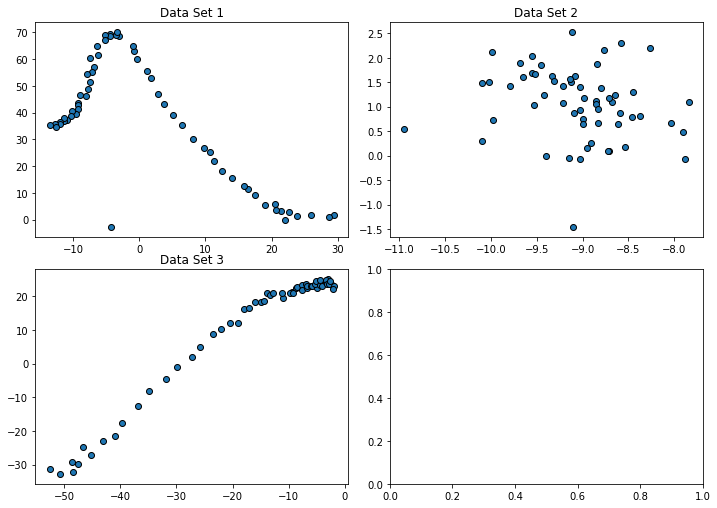

In [64]:
#define subplots
fig, ax = plt.subplots(2, 2, figsize=(10,7))
fig.tight_layout()

df_ethanol_161_set1_x = scalar1.transform(df_ethanol_161_set1[feature_columns])
df_ethanol_161_set1_x = pca1.transform(df_ethanol_161_set1_x)
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
ax[0, 0].scatter(df_ethanol_161_set1_x[:, 0], df_ethanol_161_set1_x[:, 1], **kwarg_params)
ax[0, 0].title.set_text('Data Set 1')

df_ethanol_161_set2_x = scalar2.transform(df_ethanol_161_set2[feature_columns])
df_ethanol_161_set2_x = pca2.transform(df_ethanol_161_set2_x)
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
ax[0, 1].scatter(df_ethanol_161_set2_x[:, 0], df_ethanol_161_set2_x[:, 1], **kwarg_params)
ax[0, 1].title.set_text('Data Set 2')

df_ethanol_161_set3_x = scalar3.transform(df_ethanol_161_set3[feature_columns])
df_ethanol_161_set3_x = pca3.transform(df_ethanol_161_set3_x)
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
ax[1, 0].scatter(df_ethanol_161_set3_x[:, 0], df_ethanol_161_set3_x[:, 1], **kwarg_params)
ax[1, 0].title.set_text('Data Set 3')

## Ethenol 200ppm PCA

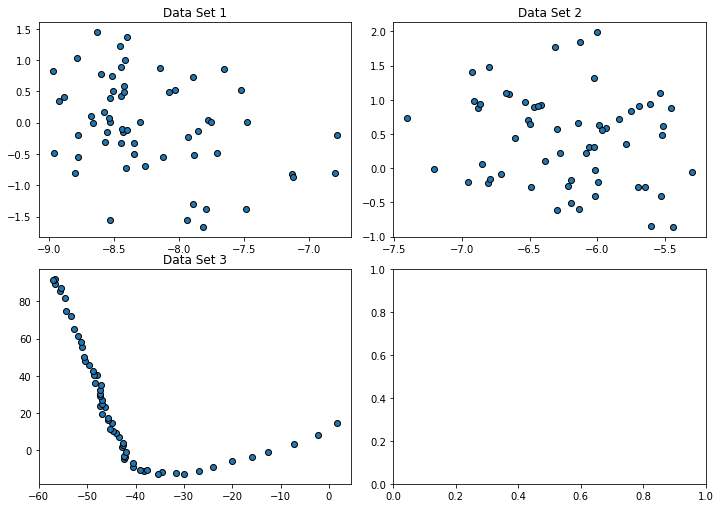

In [65]:
#define subplots
fig, ax = plt.subplots(2, 2, figsize=(10,7))
fig.tight_layout()

df_ethanol_200_set1_x = scalar1.transform(df_ethanol_200_set1[feature_columns])
df_ethanol_200_set1_x = pca1.transform(df_ethanol_200_set1_x)
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
ax[0, 0].scatter(df_ethanol_200_set1_x[:, 0], df_ethanol_200_set1_x[:, 1], **kwarg_params)
ax[0, 0].title.set_text('Data Set 1')

df_ethanol_200_set2_x = scalar2.transform(df_ethanol_200_set2[feature_columns])
df_ethanol_200_set2_x = pca2.transform(df_ethanol_200_set2_x)
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
ax[0, 1].scatter(df_ethanol_200_set2_x[:, 0], df_ethanol_200_set2_x[:, 1], **kwarg_params)
ax[0, 1].title.set_text('Data Set 2')

df_ethanol_200_set3_x = scalar3.transform(df_ethanol_200_set3[feature_columns])
df_ethanol_200_set3_x = pca3.transform(df_ethanol_200_set3_x)
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
ax[1, 0].scatter(df_ethanol_200_set3_x[:, 0], df_ethanol_200_set3_x[:, 1], **kwarg_params)
ax[1, 0].title.set_text('Data Set 3')

## Methanol 292ppm PCA

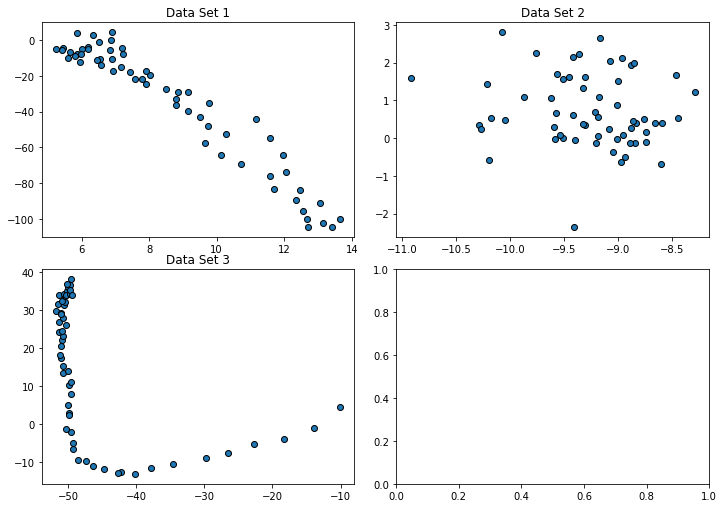

In [66]:
df_methanol_292_sc = scalar.fit_transform(pd.concat([df_base_line[feature_columns],df_methanol_292[feature_columns]]))
df_methanol_292_pca = pca.fit_transform(df_methanol_292_sc)

#define subplots
fig, ax = plt.subplots(2, 2, figsize=(10,7))
fig.tight_layout()

df_methanol_292_set1_x = scalar1.transform(df_methanol_292_set1[feature_columns])
df_methanol_292_set1_x = pca1.transform(df_methanol_292_set1_x)
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
ax[0, 0].scatter(df_methanol_292_set1_x[:, 0], df_methanol_292_set1_x[:, 1], **kwarg_params)
ax[0, 0].title.set_text('Data Set 1')

df_methanol_292_set2_x = scalar2.transform(df_methanol_292_set2[feature_columns])
df_methanol_292_set2_x = pca2.transform(df_methanol_292_set2_x)
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
ax[0, 1].scatter(df_methanol_292_set2_x[:, 0], df_methanol_292_set2_x[:, 1], **kwarg_params)
ax[0, 1].title.set_text('Data Set 2')

df_methanol_292_set3_x = scalar3.transform(df_methanol_292_set3[feature_columns])
df_methanol_292_set3_x = pca3.transform(df_methanol_292_set3_x)
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
ax[1, 0].scatter(df_methanol_292_set3_x[:, 0], df_methanol_292_set3_x[:, 1], **kwarg_params)
ax[1, 0].title.set_text('Data Set 3')

## Methanol 137ppm PCA

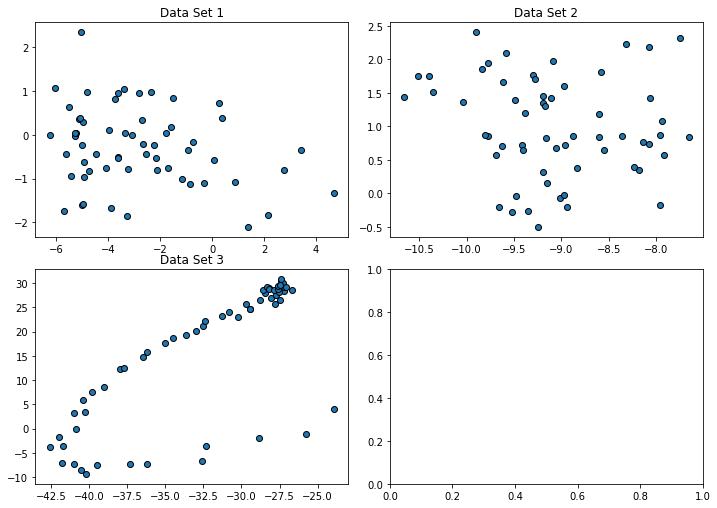

In [67]:
#define subplots
fig, ax = plt.subplots(2, 2, figsize=(10,7))
fig.tight_layout()

df_methanol_137_set1_x = scalar1.transform(df_methanol_137_set1[feature_columns])
df_methanol_137_set1_x = pca1.transform(df_methanol_137_set1_x)
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
ax[0, 0].scatter(df_methanol_137_set1_x[:, 0], df_methanol_137_set1_x[:, 1], **kwarg_params)
ax[0, 0].title.set_text('Data Set 1')

df_methanol_137_set2_x = scalar2.transform(df_methanol_137_set2[feature_columns])
df_methanol_137_set2_x = pca2.transform(df_methanol_137_set2_x)
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
ax[0, 1].scatter(df_methanol_137_set2_x[:, 0], df_methanol_137_set2_x[:, 1], **kwarg_params)
ax[0, 1].title.set_text('Data Set 2')

df_methanol_137_set3_x = scalar3.transform(df_methanol_137_set3[feature_columns])
df_methanol_137_set3_x = pca3.transform(df_methanol_137_set3_x)
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
ax[1, 0].scatter(df_methanol_137_set3_x[:, 0], df_methanol_137_set3_x[:, 1], **kwarg_params)
ax[1, 0].title.set_text('Data Set 3')

## Methanol 164ppm PCA

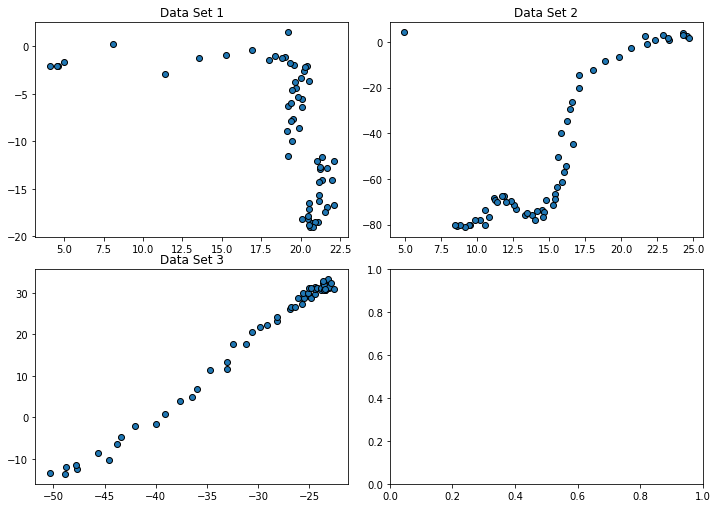

In [68]:
#define subplots
fig, ax = plt.subplots(2, 2, figsize=(10,7))
fig.tight_layout()

df_methanol_164_set1_x = scalar1.transform(df_methanol_164_set1[feature_columns])
df_methanol_164_set1_x = pca.transform(df_methanol_164_set1_x)
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
ax[0, 0].scatter(df_methanol_164_set1_x[:, 0], df_methanol_164_set1_x[:, 1], **kwarg_params)
ax[0, 0].title.set_text('Data Set 1')

df_methanol_164_set2_x = scalar2.transform(df_methanol_164_set2[feature_columns])
df_methanol_164_set2_x = pca2.transform(df_methanol_164_set2_x)
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
ax[0, 1].scatter(df_methanol_164_set2_x[:, 0], df_methanol_164_set2_x[:, 1], **kwarg_params)
ax[0, 1].title.set_text('Data Set 2')

df_methanol_164_set3_x = scalar3.transform(df_methanol_164_set3[feature_columns])
df_methanol_164_set3_x = pca3.transform(df_methanol_164_set3_x)
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
ax[1, 0].scatter(df_methanol_164_set3_x[:, 0], df_methanol_164_set3_x[:, 1], **kwarg_params)
ax[1, 0].title.set_text('Data Set 3')

## Isopropanol 217ppm PCA

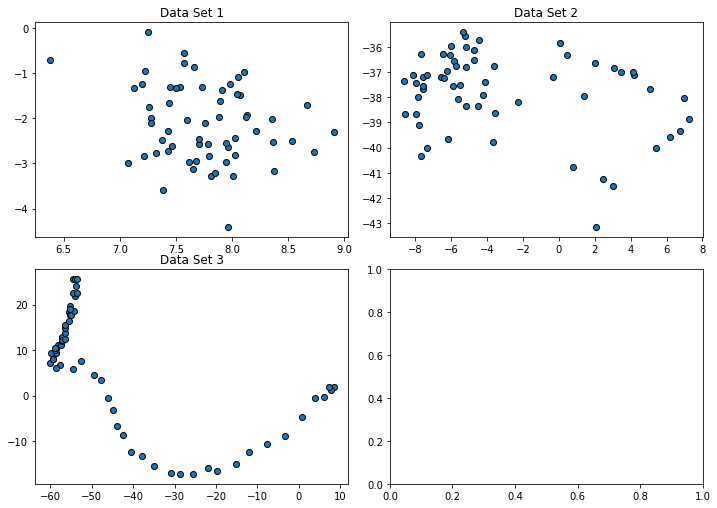

In [69]:
#define subplots
fig, ax = plt.subplots(2, 2, figsize=(10,7))
fig.tight_layout()

df_isopropanol_217_set1_x = scalar1.transform(df_isopropanol_217_set1[feature_columns])
df_isopropanol_217_set1_x = pca.transform(df_isopropanol_217_set1_x)
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
ax[0, 0].scatter(df_isopropanol_217_set1_x[:, 0], df_isopropanol_217_set1_x[:, 1], **kwarg_params)
ax[0, 0].title.set_text('Data Set 1')

df_isopropanol_217_set2_x = scalar2.transform(df_isopropanol_217_set2[feature_columns])
df_isopropanol_217_set2_x = pca2.transform(df_isopropanol_217_set2_x)
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
ax[0, 1].scatter(df_isopropanol_217_set2_x[:, 0], df_isopropanol_217_set2_x[:, 1], **kwarg_params)
ax[0, 1].title.set_text('Data Set 2')

df_isopropanol_217_set3_x = scalar3.transform(df_isopropanol_217_set3[feature_columns])
df_isopropanol_217_set3_x = pca3.transform(df_isopropanol_217_set3_x)
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
ax[1, 0].scatter(df_isopropanol_217_set3_x[:, 0], df_isopropanol_217_set3_x[:, 1], **kwarg_params)
ax[1, 0].title.set_text('Data Set 3')

## Isopropanol 117ppm PCA

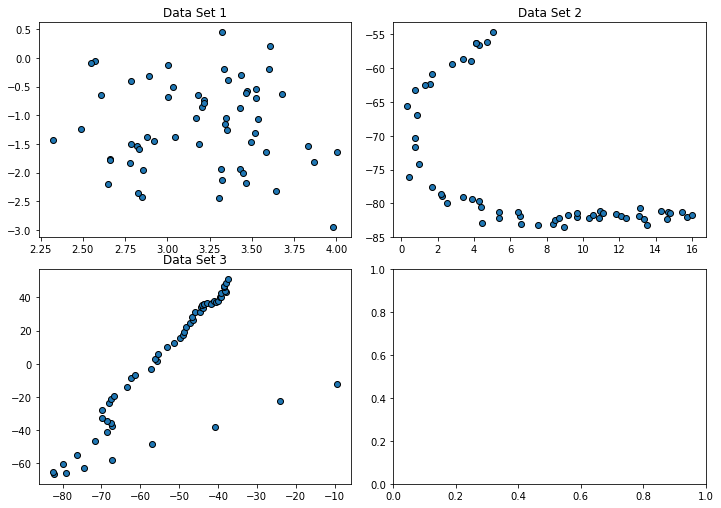

In [70]:
#define subplots
fig, ax = plt.subplots(2, 2, figsize=(10,7))
fig.tight_layout()

df_isopropanol_117_set1_x = scalar1.transform(df_isopropanol_117_set1[feature_columns])
df_isopropanol_117_set1_x = pca.transform(df_isopropanol_117_set1_x)
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
ax[0, 0].scatter(df_isopropanol_117_set1_x[:, 0], df_isopropanol_117_set1_x[:, 1], **kwarg_params)
ax[0, 0].title.set_text('Data Set 1')

df_isopropanol_117_set2_x = scalar2.transform(df_isopropanol_117_set2[feature_columns])
df_isopropanol_117_set2_x = pca2.transform(df_isopropanol_117_set2_x)
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
ax[0, 1].scatter(df_isopropanol_117_set2_x[:, 0], df_isopropanol_117_set2_x[:, 1], **kwarg_params)
ax[0, 1].title.set_text('Data Set 2')

df_isopropanol_117_set3_x = scalar3.transform(df_isopropanol_117_set3[feature_columns])
df_isopropanol_117_set3_x = pca3.transform(df_isopropanol_117_set3_x)
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
ax[1, 0].scatter(df_isopropanol_117_set3_x[:, 0], df_isopropanol_117_set3_x[:, 1], **kwarg_params)
ax[1, 0].title.set_text('Data Set 3')

# Isopropanol 143ppm PCA

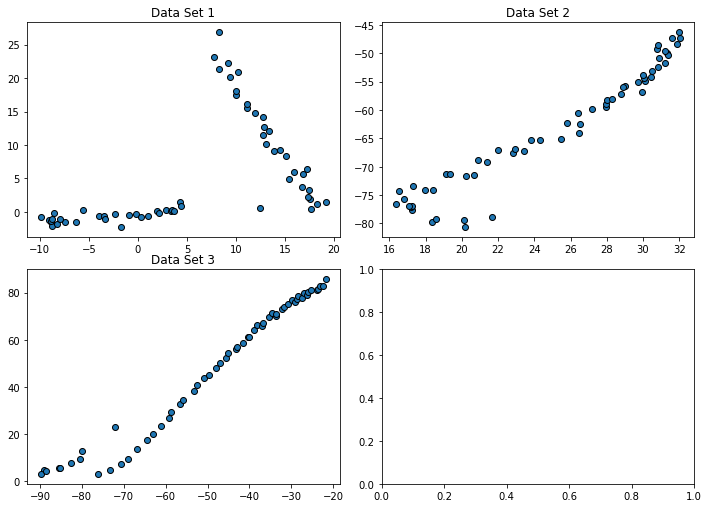

In [71]:
#define subplots
fig, ax = plt.subplots(2, 2, figsize=(10,7))
fig.tight_layout()

df_isopropanol_143_set1_x = scalar1.transform(df_isopropanol_143_set1[feature_columns])
df_isopropanol_143_set1_x = pca1.transform(df_isopropanol_143_set1_x)
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
ax[0, 0].scatter(df_isopropanol_143_set1_x[:, 0], df_isopropanol_143_set1_x[:, 1], **kwarg_params)
ax[0, 0].title.set_text('Data Set 1')

df_isopropanol_143_set2_x = scalar2.transform(df_isopropanol_143_set2[feature_columns])
df_isopropanol_143_set2_x = pca2.transform(df_isopropanol_143_set2_x)
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
ax[0, 1].scatter(df_isopropanol_143_set2_x[:, 0], df_isopropanol_143_set2_x[:, 1], **kwarg_params)
ax[0, 1].title.set_text('Data Set 2')

df_isopropanol_143_set3_x = scalar3.transform(df_isopropanol_143_set3[feature_columns])
df_isopropanol_143_set3_x = pca3.transform(df_isopropanol_143_set3_x)
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
ax[1, 0].scatter(df_isopropanol_143_set3_x[:, 0], df_isopropanol_143_set3_x[:, 1], **kwarg_params)
ax[1, 0].title.set_text('Data Set 3')

## DCT 

# Ethanol 200ppm 

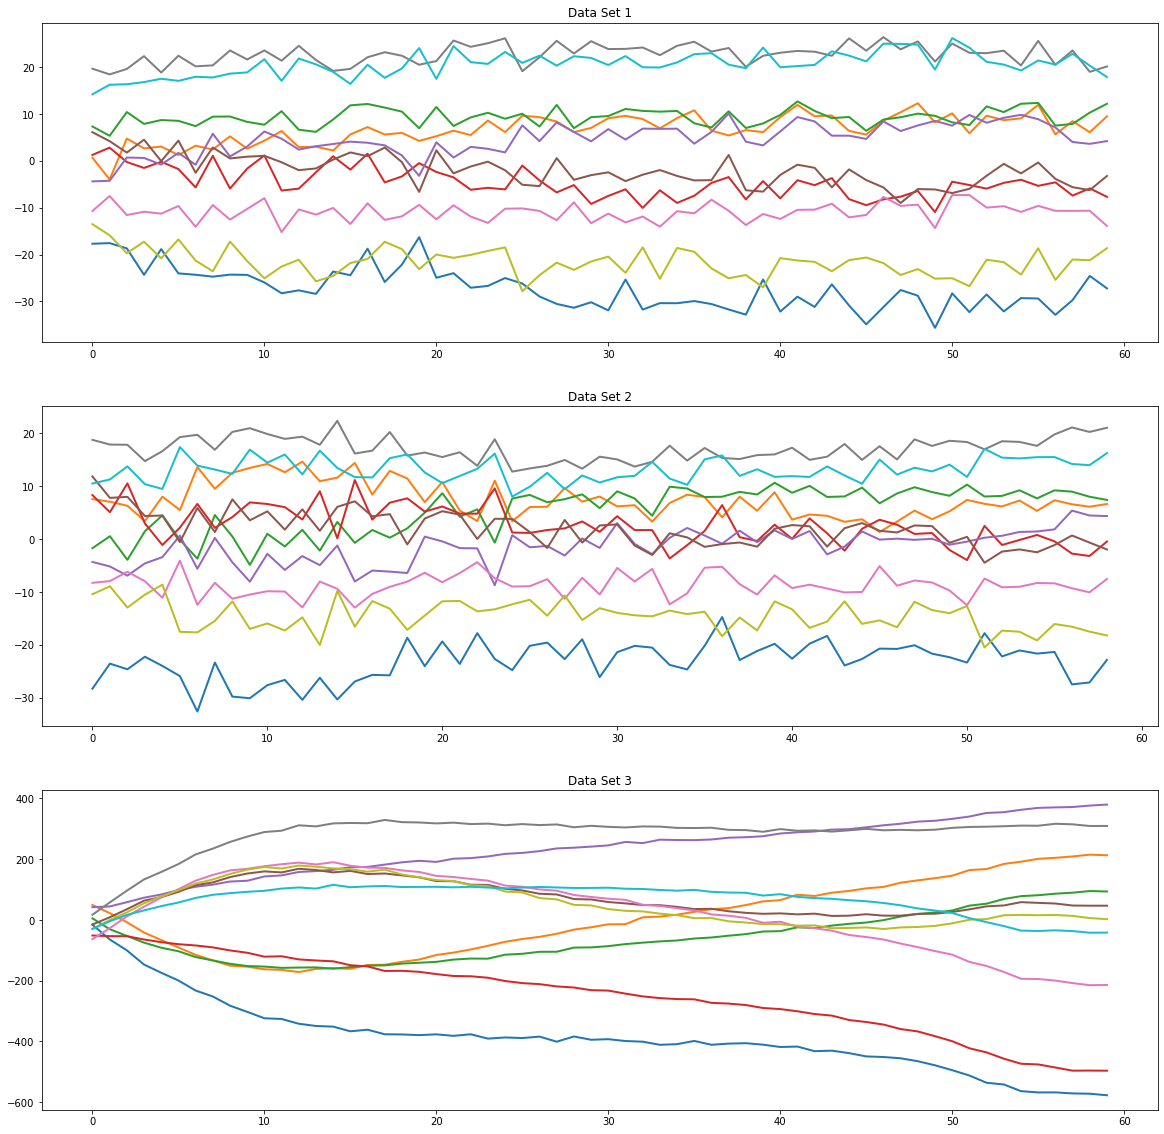

In [72]:
plt.figure(figsize = (20,20))
plt.subplot(3, 1, 1)
df_ethanol_200_set1_sc = scalar1.transform(df_ethanol_200_set1[feature_columns])
df_ethanol_200_set1_dct = fft.dct(df_ethanol_200_set1_sc)
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
plt.plot(pd.DataFrame(df_ethanol_200_set1_dct, columns = feature_columns),linewidth=2)
plt.title('Data Set 1')

plt.subplot(3, 1, 2)
df_ethanol_200_set2_sc = scalar2.transform(df_ethanol_200_set2[feature_columns])
df_ethanol_200_set2_dct = fft.dct(df_ethanol_200_set2_sc)
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
plt.plot(pd.DataFrame(df_ethanol_200_set2_dct, columns = feature_columns),linewidth=2)
plt.title('Data Set 2')

plt.subplot(3, 1, 3)
df_ethanol_200_set3_sc = scalar3.transform(df_ethanol_200_set3[feature_columns])
df_ethanol_200_set3_dct = fft.dct(df_ethanol_200_set3_sc)
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
plt.plot(pd.DataFrame(df_ethanol_200_set3_dct, columns = feature_columns),linewidth=2)
plt.title('Data Set 3')

plt.show()

## Ethanol 123 ppm

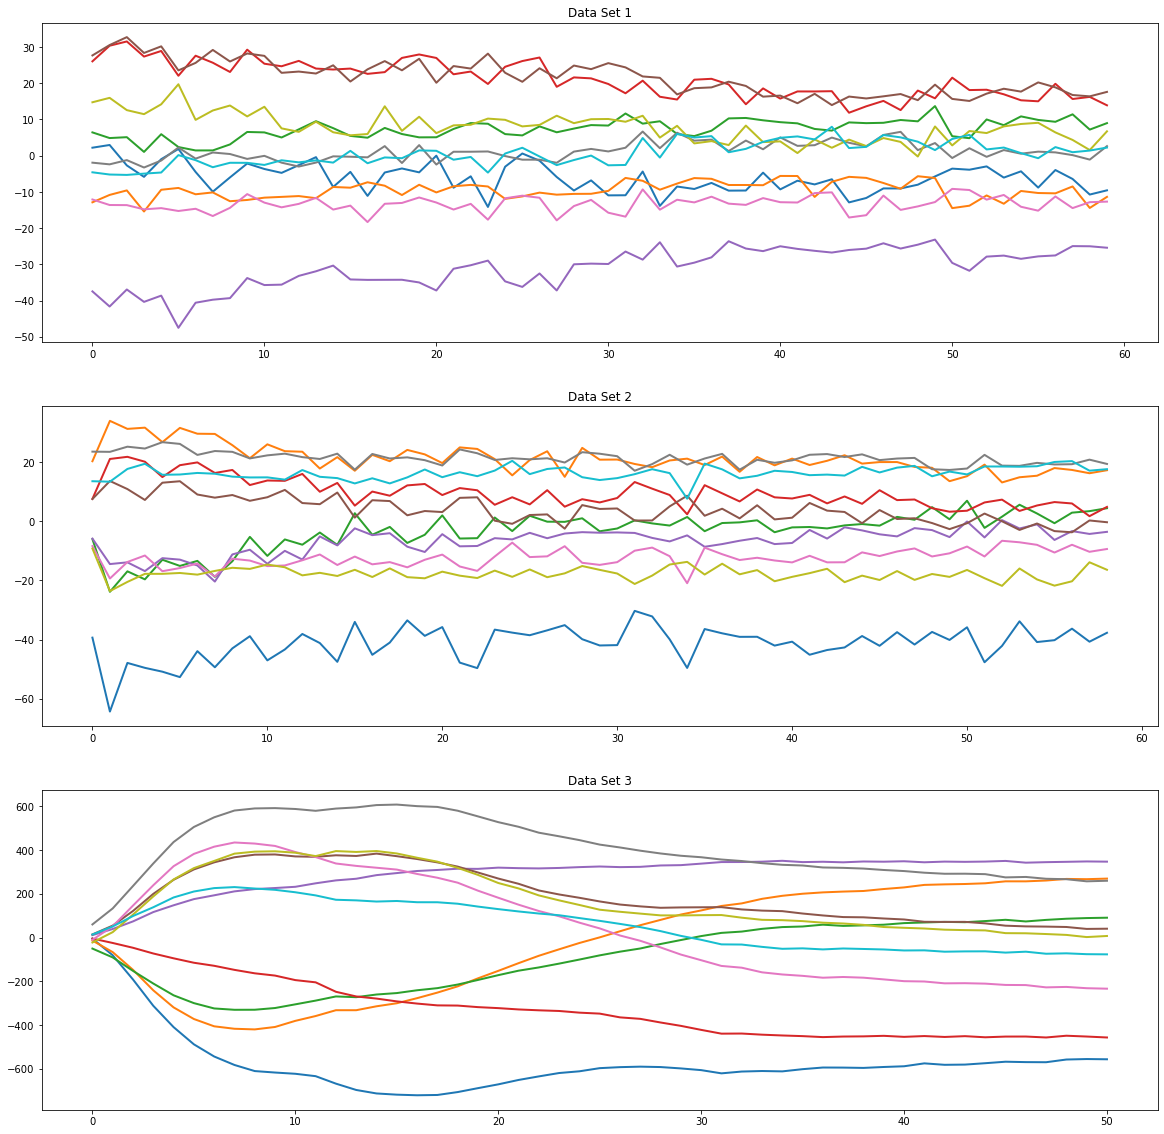

In [73]:
plt.figure(figsize = (20,20))
plt.subplot(3, 1, 1)
df_ethanol_123_set1_sc = scalar1.transform(df_ethanol_123_set1[feature_columns])
df_ethanol_123_set1_dct = fft.dct(df_ethanol_123_set1_sc)
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
plt.plot(pd.DataFrame(df_ethanol_123_set1_dct, columns = feature_columns),linewidth=2)
plt.title('Data Set 1')

plt.subplot(3, 1, 2)
df_ethanol_123_set2_sc = scalar2.transform(df_ethanol_123_set2[feature_columns])
df_ethanol_123_set2_dct = fft.dct(df_ethanol_123_set2_sc)
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
plt.plot(pd.DataFrame(df_ethanol_123_set2_dct, columns = feature_columns),linewidth=2)
plt.title('Data Set 2')

plt.subplot(3, 1, 3)
df_ethanol_123_set3_sc = scalar3.transform(df_ethanol_123_set3[feature_columns])
df_ethanol_123_set3_dct = fft.dct(df_ethanol_123_set3_sc)
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
plt.plot(pd.DataFrame(df_ethanol_123_set3_dct, columns = feature_columns),linewidth=2)
plt.title('Data Set 3')

plt.show()

## Ethanol 161ppm

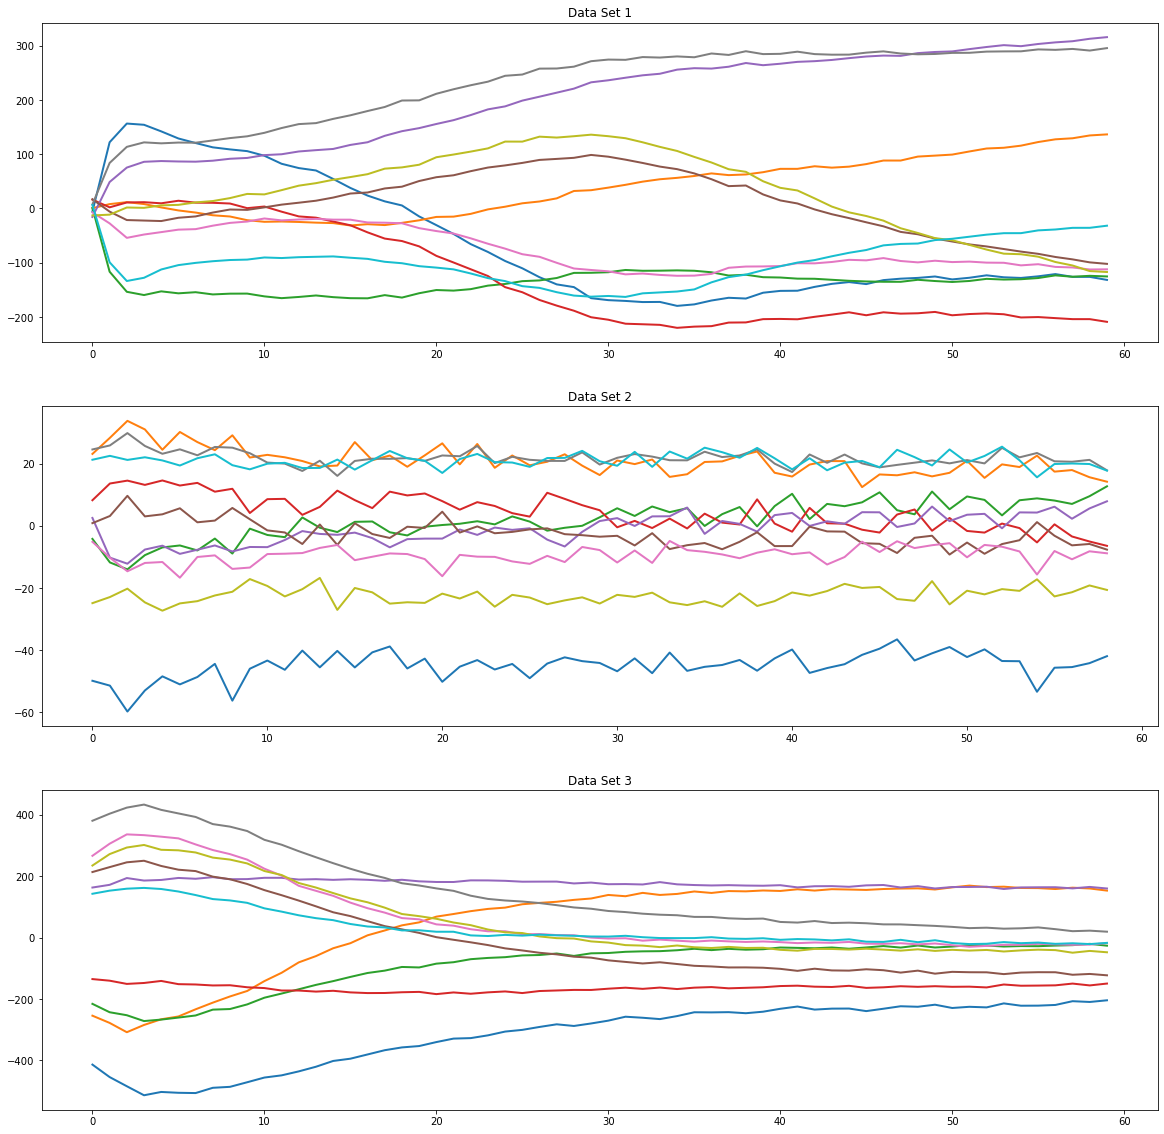

In [74]:
plt.figure(figsize = (20,20))
plt.subplot(3, 1, 1)
df_ethanol_161_set1_sc = scalar1.transform(df_ethanol_161_set1[feature_columns])
df_ethanol_161_set1_dct = fft.dct(df_ethanol_161_set1_sc)
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
plt.plot(pd.DataFrame(df_ethanol_161_set1_dct, columns = feature_columns),linewidth=2)
plt.title('Data Set 1')

plt.subplot(3, 1, 2)
df_ethanol_161_set2_sc = scalar2.transform(df_ethanol_161_set2[feature_columns])
df_ethanol_161_set2_dct = fft.dct(df_ethanol_161_set2_sc)
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
plt.plot(pd.DataFrame(df_ethanol_161_set2_dct, columns = feature_columns),linewidth=2)
plt.title('Data Set 2')

plt.subplot(3, 1, 3)
df_ethanol_161_set3_sc = scalar3.transform(df_ethanol_161_set3[feature_columns])
df_ethanol_161_set3_dct = fft.dct(df_ethanol_161_set3_sc)
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
plt.plot(pd.DataFrame(df_ethanol_161_set3_dct, columns = feature_columns),linewidth=2)
plt.title('Data Set 3')

plt.show()

## Methanol 292 ppm

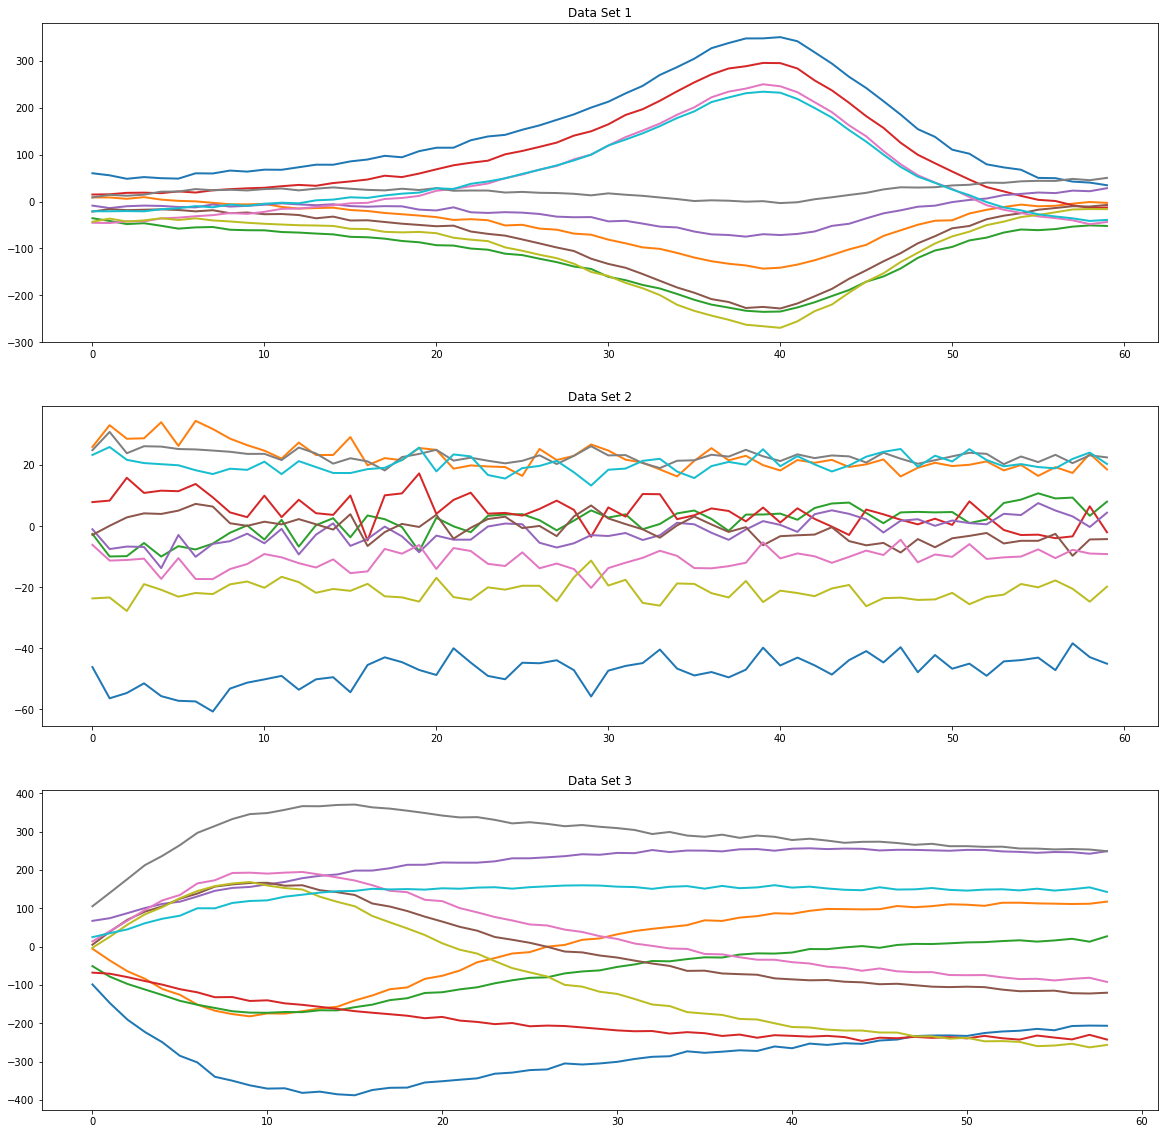

In [75]:
plt.figure(figsize = (20,20))
plt.subplot(3, 1, 1)
df_methanol_292_set1_sc = scalar1.transform(df_methanol_292_set1[feature_columns])
df_methanol_292_set1_dct = fft.dct(df_methanol_292_set1_sc)
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
plt.plot(pd.DataFrame(df_methanol_292_set1_dct, columns = feature_columns),linewidth=2)
plt.title('Data Set 1')

plt.subplot(3, 1, 2)
df_methanol_292_set2_sc = scalar2.transform(df_methanol_292_set2[feature_columns])
df_methanol_292_set2_dct = fft.dct(df_methanol_292_set2_sc)
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
plt.plot(pd.DataFrame(df_methanol_292_set2_dct, columns = feature_columns),linewidth=2)
plt.title('Data Set 2')

plt.subplot(3, 1, 3)
df_methanol_292_set3_sc = scalar3.transform(df_methanol_292_set3[feature_columns])
df_methanol_292_set3_dct = fft.dct(df_methanol_292_set3_sc)
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
plt.plot(pd.DataFrame(df_methanol_292_set3_dct, columns = feature_columns),linewidth=2)
plt.title('Data Set 3')

plt.show()

## Methanol 137 ppm

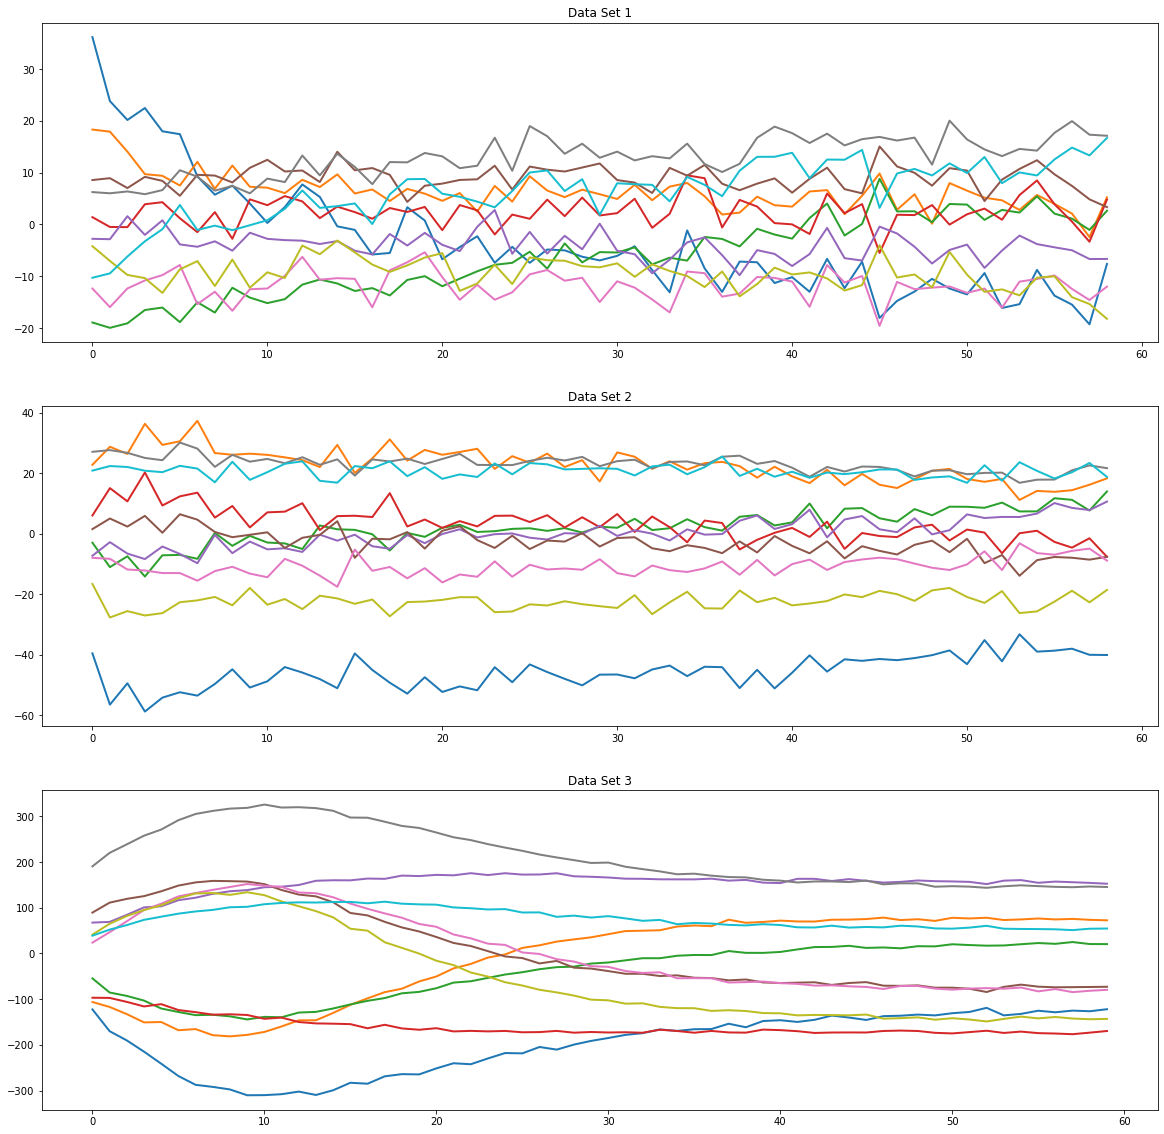

In [76]:
plt.figure(figsize = (20,20))
plt.subplot(3, 1, 1)
df_methanol_137_set1_sc = scalar1.transform(df_methanol_137_set1[feature_columns])
df_methanol_137_set1_dct = fft.dct(df_methanol_137_set1_sc)
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
plt.plot(pd.DataFrame(df_methanol_137_set1_dct, columns = feature_columns),linewidth=2)
plt.title('Data Set 1')

plt.subplot(3, 1, 2)
df_methanol_137_set2_sc = scalar2.transform(df_methanol_137_set2[feature_columns])
df_methanol_137_set2_dct = fft.dct(df_methanol_137_set2_sc)
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
plt.plot(pd.DataFrame(df_methanol_137_set2_dct, columns = feature_columns),linewidth=2)
plt.title('Data Set 2')

plt.subplot(3, 1, 3)
df_methanol_137_set3_sc = scalar3.transform(df_methanol_137_set3[feature_columns])
df_methanol_137_set3_dct = fft.dct(df_methanol_137_set3_sc)
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
plt.plot(pd.DataFrame(df_methanol_137_set3_dct, columns = feature_columns),linewidth=2)
plt.title('Data Set 3')

plt.show()

## Methanol 164ppm

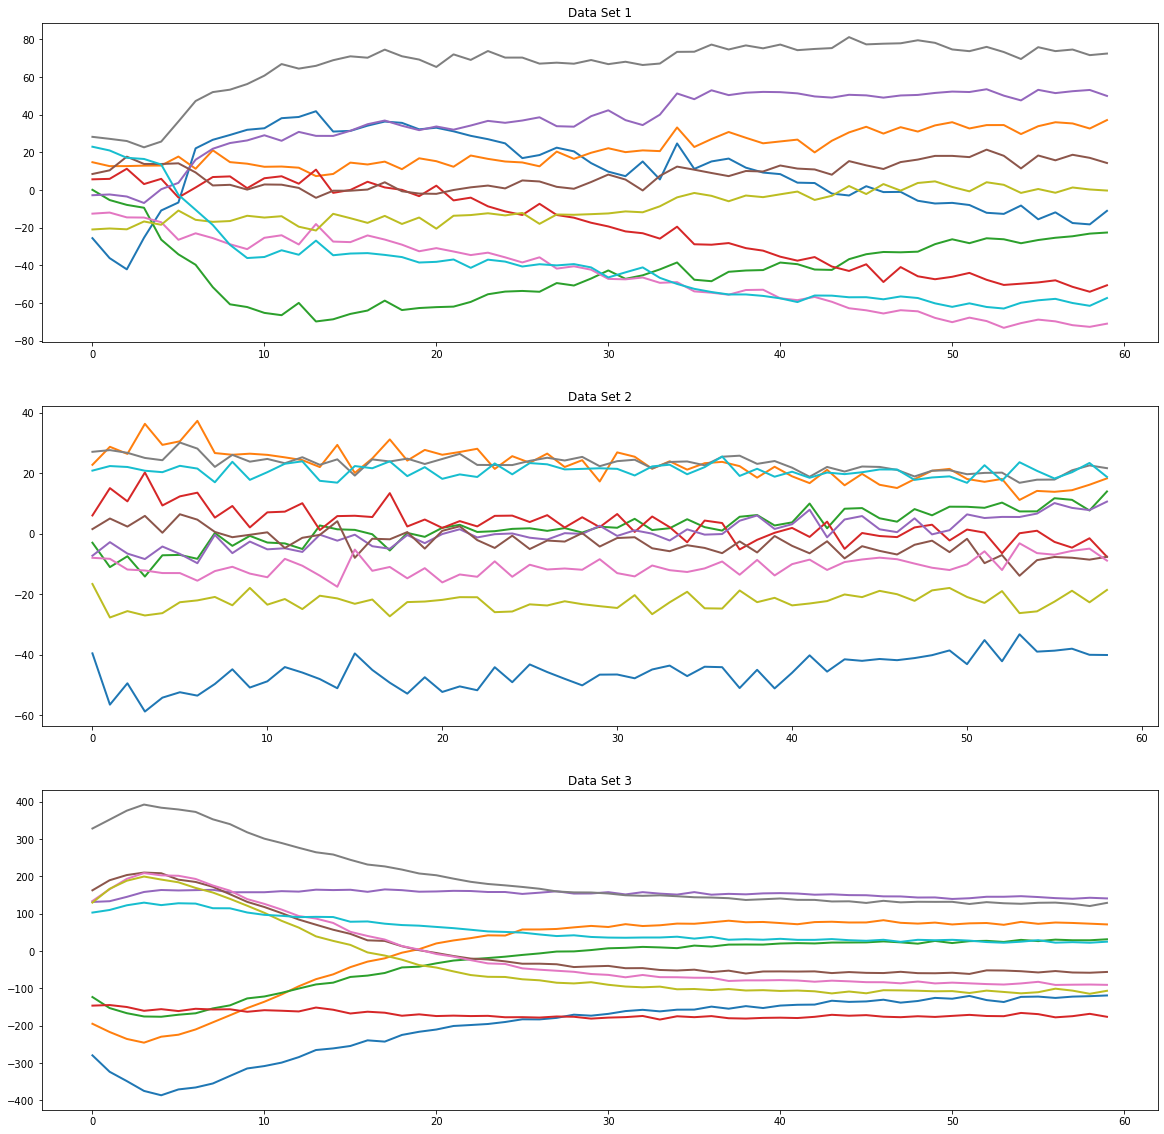

In [77]:
plt.figure(figsize = (20,20))
plt.subplot(3, 1, 1)
df_methanol_164_set1_sc = scalar1.transform(df_methanol_164_set1[feature_columns])
df_methanol_164_set1_dct = fft.dct(df_methanol_164_set1_sc)
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
plt.plot(pd.DataFrame(df_methanol_164_set1_dct, columns = feature_columns),linewidth=2)
plt.title('Data Set 1')

plt.subplot(3, 1, 2)
df_methanol_164_set2_sc = scalar2.transform(df_methanol_164_set2[feature_columns])
df_methanol_164_set2_dct = fft.dct(df_methanol_164_set2_sc)
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
plt.plot(pd.DataFrame(df_methanol_137_set2_dct, columns = feature_columns),linewidth=2)
plt.title('Data Set 2')

plt.subplot(3, 1, 3)
df_methanol_164_set3_sc = scalar3.transform(df_methanol_164_set3[feature_columns])
df_methanol_164_set3_dct = fft.dct(df_methanol_164_set3_sc)
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
plt.plot(pd.DataFrame(df_methanol_164_set3_dct, columns = feature_columns),linewidth=2)
plt.title('Data Set 3')

plt.show()

## Isopropanol 217ppm

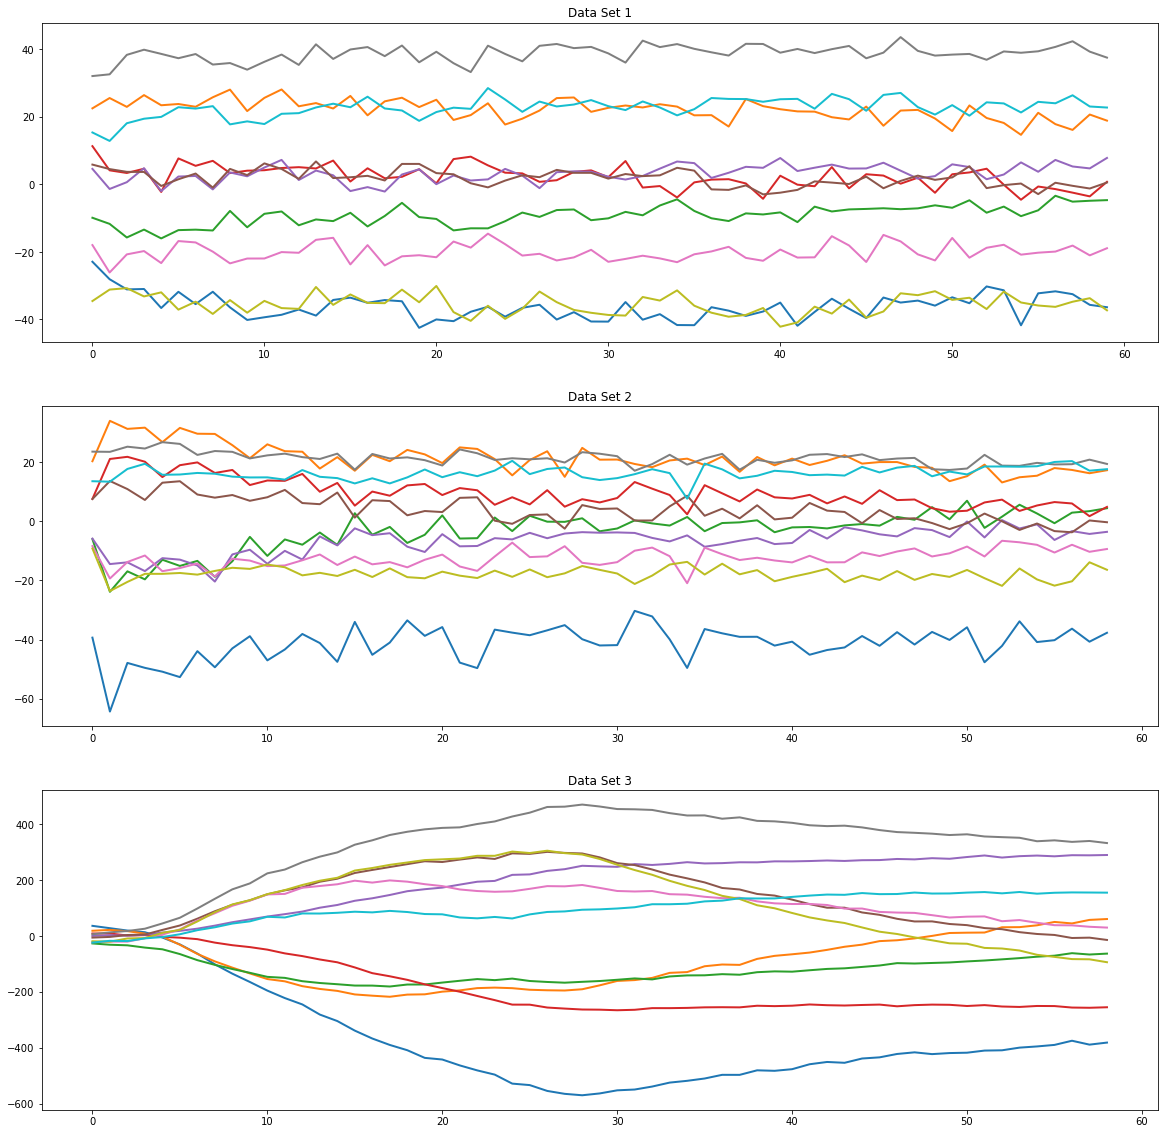

In [78]:
plt.figure(figsize = (20,20))
plt.subplot(3, 1, 1)
df_isopropanol_217_set1_sc = scalar1.transform(df_isopropanol_217_set1[feature_columns])
df_isopropanol_217_set1_dct = fft.dct(df_isopropanol_217_set1_sc)
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
plt.plot(pd.DataFrame(df_isopropanol_217_set1_dct, columns = feature_columns),linewidth=2)
plt.title('Data Set 1')

plt.subplot(3, 1, 2)
df_isopropanol_217_set2_sc = scalar2.transform(df_isopropanol_217_set2[feature_columns])
df_isopropanol_217_set2_dct = fft.dct(df_isopropanol_217_set2_sc)
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
plt.plot(pd.DataFrame(df_ethanol_123_set2_dct, columns = feature_columns),linewidth=2)
plt.title('Data Set 2')

plt.subplot(3, 1, 3)
df_isopropanol_217_set3_sc = scalar3.transform(df_isopropanol_217_set3[feature_columns])
df_isopropanol_217_set3_dct = fft.dct(df_isopropanol_217_set3_sc)
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
plt.plot(pd.DataFrame(df_isopropanol_217_set3_dct, columns = feature_columns),linewidth=2)
plt.title('Data Set 3')

plt.show()

## Isopropanol 117ppm 

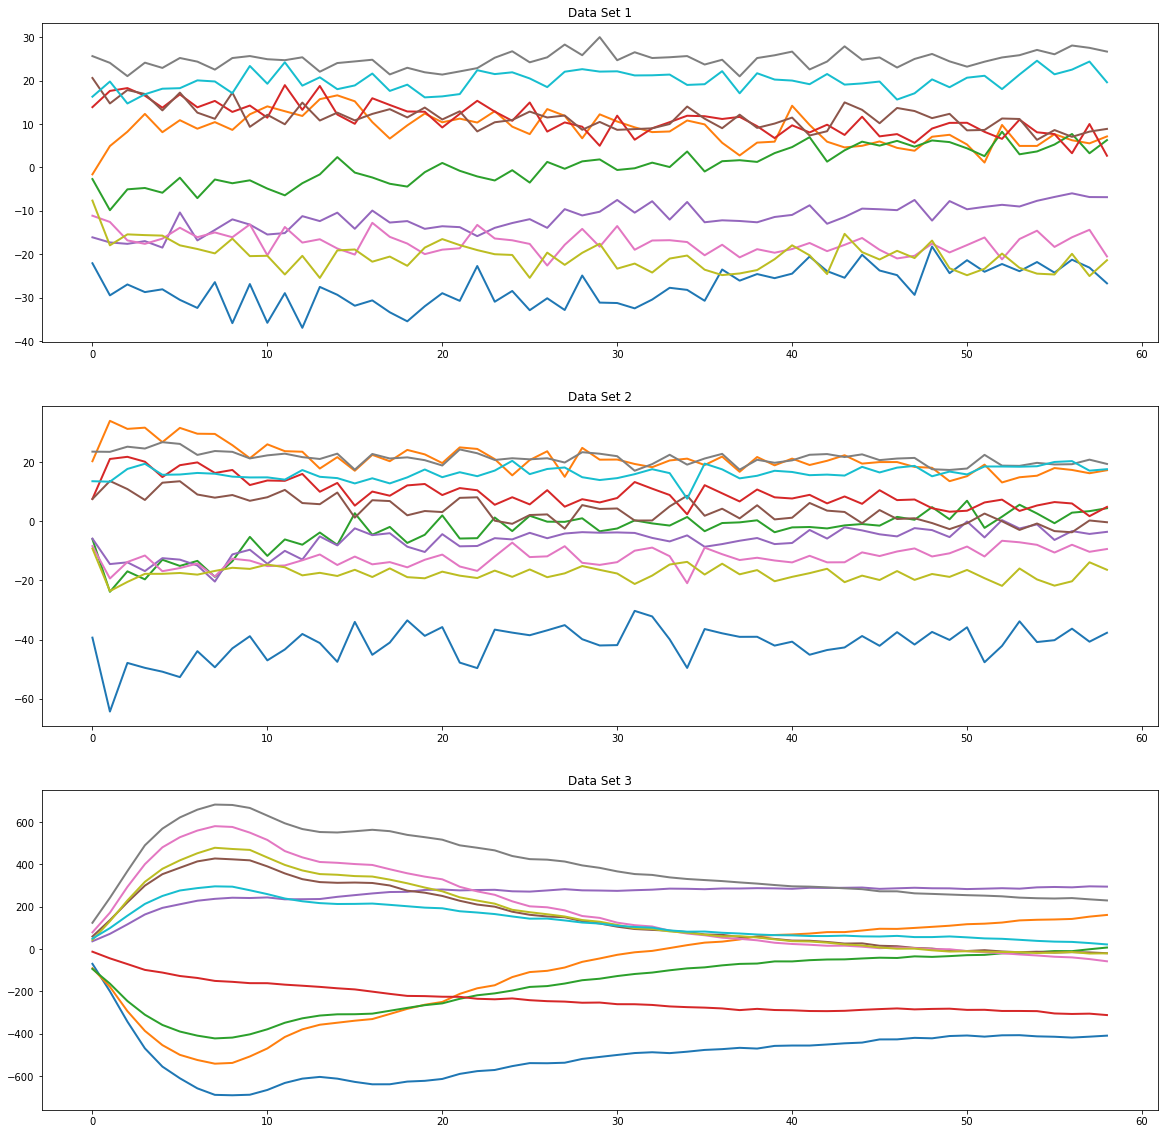

In [79]:
plt.figure(figsize = (20,20))
plt.subplot(3, 1, 1)
df_isopropanol_117_set1_sc = scalar1.transform(df_isopropanol_117_set1[feature_columns])
df_isopropanol_117_set1_dct = fft.dct(df_isopropanol_117_set1_sc)
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
plt.plot(pd.DataFrame(df_isopropanol_117_set1_dct, columns = feature_columns),linewidth=2)
plt.title('Data Set 1')

plt.subplot(3, 1, 2)
df_isopropanol_117_set2_sc = scalar2.transform(df_isopropanol_117_set2[feature_columns])
df_isopropanol_117_set2_dct = fft.dct(df_isopropanol_117_set2_sc)
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
plt.plot(pd.DataFrame(df_ethanol_123_set2_dct, columns = feature_columns),linewidth=2)
plt.title('Data Set 2')

plt.subplot(3, 1, 3)
df_isopropanol_117_set3_sc = scalar3.transform(df_isopropanol_117_set3[feature_columns])
df_isopropanol_117_set3_dct = fft.dct(df_isopropanol_117_set3_sc)
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
plt.plot(pd.DataFrame(df_isopropanol_117_set3_dct, columns = feature_columns),linewidth=2)
plt.title('Data Set 3')

plt.show()

## Isopropanol 117ppm 

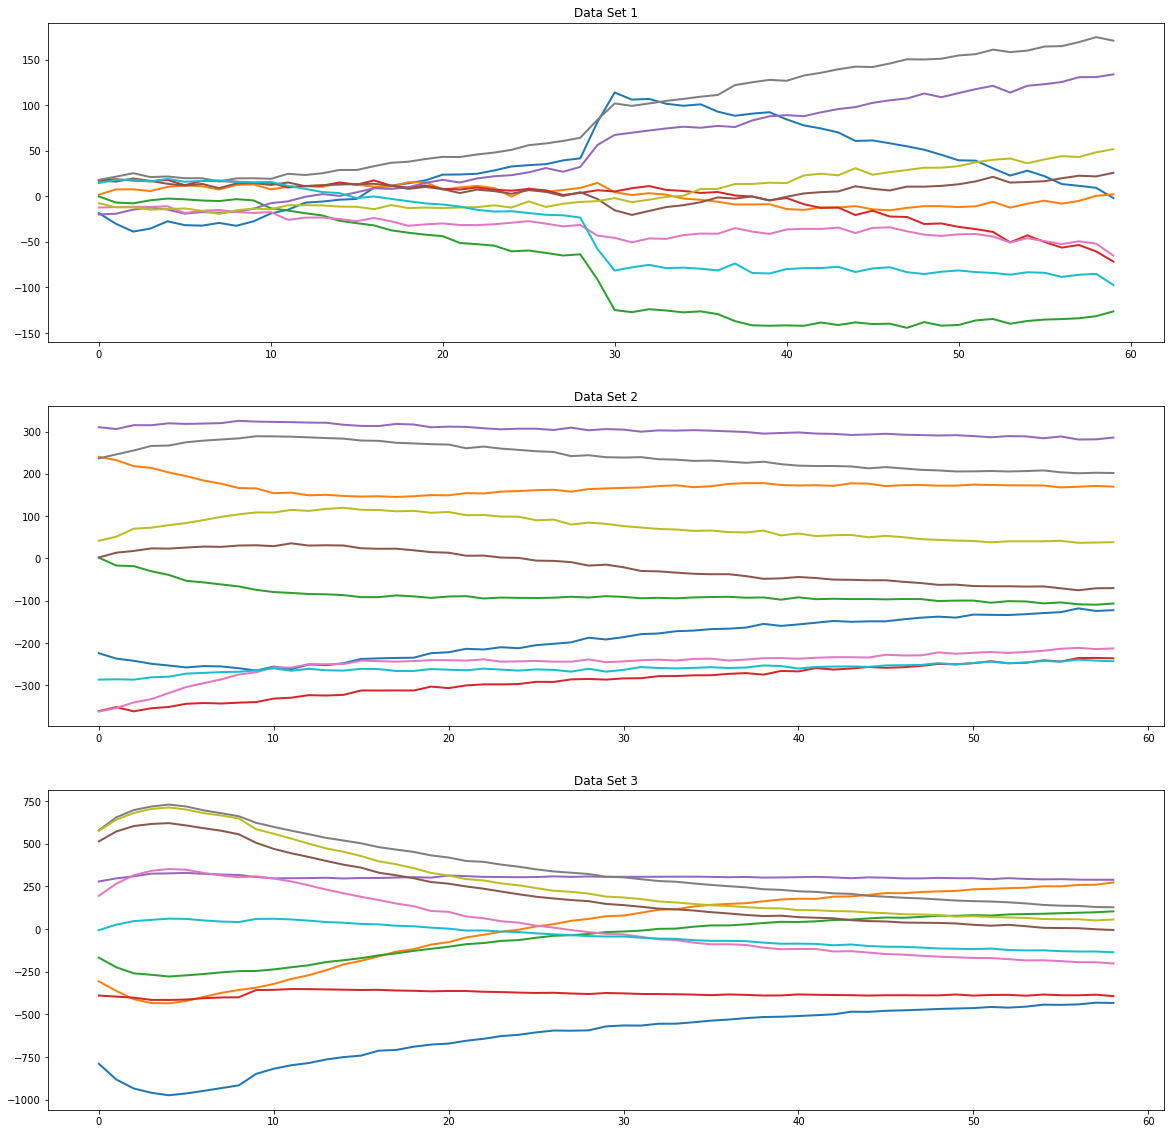

In [80]:
plt.figure(figsize = (20,20))
plt.subplot(3, 1, 1)
df_isopropanol_143_set1_sc = scalar1.transform(df_isopropanol_143_set1[feature_columns])
df_isopropanol_143_set1_dct = fft.dct(df_isopropanol_143_set1_sc)
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
plt.plot(pd.DataFrame(df_isopropanol_143_set1_dct, columns = feature_columns),linewidth=2)
plt.title('Data Set 1')

plt.subplot(3, 1, 2)
df_isopropanol_143_set2_sc = scalar2.transform(df_isopropanol_143_set2[feature_columns])
df_isopropanol_143_set2_dct = fft.dct(df_isopropanol_143_set2_sc)
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
plt.plot(pd.DataFrame(df_isopropanol_143_set2_dct, columns = feature_columns),linewidth=2)
plt.title('Data Set 2')

plt.subplot(3, 1, 3)
df_isopropanol_143_set3_sc = scalar3.transform(df_isopropanol_143_set3[feature_columns])
df_isopropanol_143_set3_dct = fft.dct(df_isopropanol_143_set3_sc)
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
plt.plot(pd.DataFrame(df_isopropanol_143_set3_dct, columns = feature_columns),linewidth=2)
plt.title('Data Set 3')

plt.show()

# Multiclass classification for Baseline , Ethanol, Methanol and Isopropanol with Multiple ppm levels

In [81]:
df_base_line['Target'] = 0
df_ethanol_123['Target'] = 1
df_ethanol_200['Target'] = 2
df_ethanol_161['Target'] = 3
df_methanol_292['Target'] = 4
df_methanol_137['Target'] = 5
df_methanol_164['Target'] = 5
df_isopropanol_217['Target'] = 7
df_isopropanol_117['Target'] = 8
df_isopropanol_143['Target'] = 9

In [82]:
target_column = ['Target']

In [83]:
df_final = pd.concat([df_base_line,df_ethanol_123,df_ethanol_200,df_ethanol_161,df_methanol_292,df_methanol_137,
                     df_methanol_164,df_isopropanol_217,df_isopropanol_117,df_isopropanol_143])

In [84]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_final[feature_columns],df_final[target_column], test_size=0.3)

In [85]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1249, 10) (536, 10) (1249, 1) (536, 1)


In [86]:
X_train_sc = scalar.fit_transform(X_train)

In [87]:
X_test_sc = scalar.transform(X_test)

In [88]:
#training a DescisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(max_depth = 20,)
rf_model.fit(X_train_sc, y_train)
rf_predictions = rf_model.predict(X_test_sc)


/var/folders/nk/ss02rr5x48n7r9wkxnws_n640000gn/T/ipykernel_59896/4209879532.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train_sc, y_train)


In [89]:
# creating a confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusion_matrix(y_test, rf_predictions)

array([[ 51,   0,   0,   0,   0,   1,   0,   0,   0],
       [  0,  54,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,  49,   0,   0,   0,   0,   0,   0],
       [  0,   1,   0,  47,   0,   2,   0,   0,   0],
       [  0,   0,   0,   0,  64,   0,   0,   0,   0],
       [  0,   0,   0,   1,   0, 102,   0,   0,   2],
       [  0,   0,   0,   0,   0,   1,  56,   0,   0],
       [  0,   1,   0,   0,   0,   0,   0,  49,   0],
       [  0,   0,   0,   0,   0,   0,   0,   1,  54]])

In [90]:
print(classification_report(y_test, rf_predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.96      1.00      0.98        54
           2       1.00      1.00      1.00        49
           3       0.98      0.94      0.96        50
           4       1.00      1.00      1.00        64
           5       0.96      0.97      0.97       105
           7       1.00      0.98      0.99        57
           8       0.98      0.98      0.98        50
           9       0.96      0.98      0.97        55

    accuracy                           0.98       536
   macro avg       0.98      0.98      0.98       536
weighted avg       0.98      0.98      0.98       536



In [91]:
rf_importance = rf_model.feature_importances_
feature_importance_rf = sorted(zip(X_train.columns, rf_importance), reverse = True)
feature_importance_rf_df = pd.DataFrame(feature_importance_rf, columns = ['Feature', 'Importance'])
feature_importance_rf_df.sort_values(by=['Importance'], inplace=True, ascending=False)

Text(0, 0.5, 'Importances')

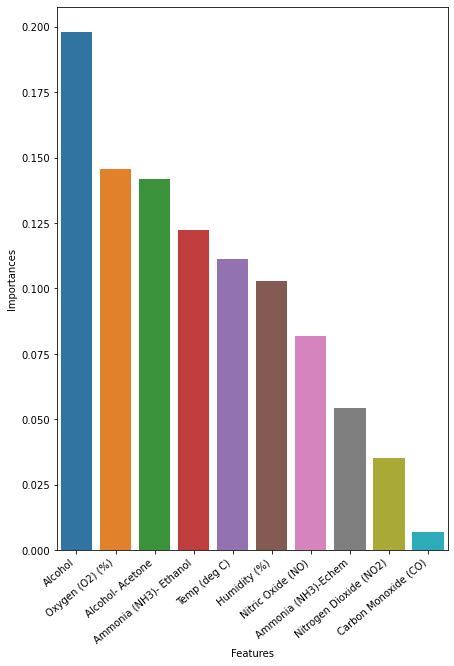

In [92]:
plt.figure(figsize = (7, 10))
ax = sns.barplot(x = feature_importance_rf_df['Feature'][:25],
           y = feature_importance_rf_df['Importance'][:25])
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = 'right')
plt.xlabel('Features')
plt.ylabel('Importances')

In [93]:
import pandas as pd
import numpy as np
import os
import shutil
import pickle as pk
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from keras import models
from keras import layers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model

Init Plugin
Init Graph Optimizer
Init Kernel


In [94]:
from sklearn import preprocessing
from keras.utils.np_utils import to_categorical
l_encode = preprocessing.LabelEncoder()
l_encode.fit(df_final[target_column])
Y = l_encode.transform(df_final[target_column])
Y = to_categorical(Y)
Y

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [95]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_final[feature_columns],Y, test_size=0.3)

In [96]:
X_train_sc = scalar.fit_transform(X_train)
X_test_sc = scalar.transform(X_test)

In [97]:
from keras.models import Sequential
from keras.layers import Dense

In [98]:
in_dim = len(df_final[feature_columns].columns)

import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Dense(9, input_dim = in_dim, activation = 'relu'),
    tf.keras.layers.Dense(15, activation = 'relu'),
    tf.keras.layers.Dense(5, activation = 'relu'),
    tf.keras.layers.Dense(9, activation = 'softmax')
])

##compile the model
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

Metal device set to: Apple M1 Pro


2022-12-05 17:50:20.457318: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-05 17:50:20.457435: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [99]:
history = model.fit(X_train_sc, y_train, epochs = 25, batch_size = 5, 
                    validation_data=(X_test_sc, y_test), 
                    verbose=2)

2022-12-05 17:50:20.859775: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-12-05 17:50:20.859952: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-05 17:50:20.975137: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/25


2022-12-05 17:50:24.936747: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


250/250 - 5s - loss: 2.1430 - accuracy: 0.1569 - val_loss: 2.1047 - val_accuracy: 0.2444
Epoch 2/25
250/250 - 2s - loss: 2.0239 - accuracy: 0.2866 - val_loss: 1.9851 - val_accuracy: 0.3246
Epoch 3/25
250/250 - 2s - loss: 1.8447 - accuracy: 0.3771 - val_loss: 1.8094 - val_accuracy: 0.3638
Epoch 4/25
250/250 - 2s - loss: 1.6414 - accuracy: 0.4051 - val_loss: 1.6153 - val_accuracy: 0.3881
Epoch 5/25
250/250 - 2s - loss: 1.4644 - accuracy: 0.4588 - val_loss: 1.4387 - val_accuracy: 0.4534
Epoch 6/25
250/250 - 2s - loss: 1.3217 - accuracy: 0.4828 - val_loss: 1.3492 - val_accuracy: 0.4832
Epoch 7/25
250/250 - 2s - loss: 1.2490 - accuracy: 0.5124 - val_loss: 1.2821 - val_accuracy: 0.5112
Epoch 8/25
250/250 - 2s - loss: 1.1857 - accuracy: 0.5468 - val_loss: 1.2321 - val_accuracy: 0.5466
Epoch 9/25
250/250 - 2s - loss: 1.1363 - accuracy: 0.5637 - val_loss: 1.1825 - val_accuracy: 0.5634
Epoch 10/25
250/250 - 2s - loss: 1.0954 - accuracy: 0.5757 - val_loss: 1.1452 - val_accuracy: 0.5728
Epoch 11/2

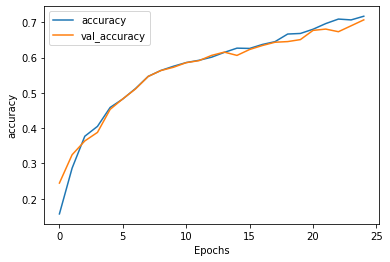

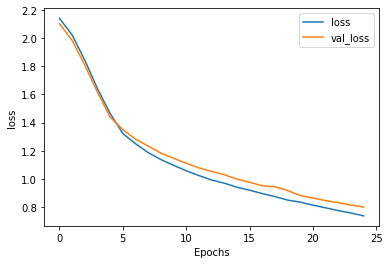

In [100]:
import matplotlib.pyplot as plt

##plot the scores from history
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.legend([string, 'val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")